In [1]:
import pandas as pd
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import seaborn as sns

df=pd.read_csv(r"D:/Career/Data Science/Capstone 1/UFC/raw_total_fight_data.csv",sep=';')
#df=pd.read_csv(r'Capstone_1/raw_total_fight_data.csv',sep=';')
df['date']=[parse(row).strftime('%m-%d-%Y') for row in df['date']]
print(df.shape)
df.head()

(5144, 41)


,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,06-08-2019,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,06-08-2019,"Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,06-08-2019,"Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,06-08-2019,"Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [2]:
df_fighter_data=pd.read_csv(r'D:/Career/Data Science/Capstone 1/UFC/raw_fighter_details.csv',sep=',')
df_fighter_data=df_fighter_data.dropna(subset=['DOB'])

df_fighter_data['DOB']=[parse(row).strftime('%m-%d-%Y') for row in df_fighter_data['DOB']]
df_fighter_data['R_fighter_DOB']=df_fighter_data['DOB']
df_fighter_data['B_fighter_DOB']=df_fighter_data['DOB']
df_fighter_data=df_fighter_data[['fighter_name','DOB']]
#df_fighter_data=df_fighter_data[['fighter_name','R_fighter_DOB','B_fighter_DOB']]
print(df_fighter_data.shape)
df_fighter_data.head(15)

(2573, 2)


,fighter_name,DOB
5,Aaron Brink,11-12-1974
6,Aaron Ely,03-18-1989
7,Aaron Jeffery,11-14-1992
8,Aaron Lanfranco,08-26-1986
10,Aaron Phillips,08-05-1989
11,Aaron Riley,12-09-1980
12,Aaron Rosa,05-28-1983
13,Aaron Simpson,07-20-1974
16,Aaron Wilkinson,01-31-1987
17,Abdul Razak Alhassan,08-11-1985


In [3]:
#import datetime
#from dateutil.parser import parse

df_data=pd.read_csv(r'D:/Career/Data Science/Capstone 1/UFC/data.csv',sep=',')
df_data.head()
df_data.columns
df_data=df_data[['R_fighter','B_fighter','date','location','weight_class']]
#df_data.columns

df_data['date']=[parse(row).strftime('%m-%d-%Y') for row in df_data['date']]
print(df_data.shape)
df_data.head(10)
#print(df_data.dtypes)

(5144, 5)


,R_fighter,B_fighter,date,location,weight_class
0,Henry Cejudo,Marlon Moraes,06-08-2019,"Chicago, Illinois, USA",Bantamweight
1,Valentina Shevchenko,Jessica Eye,06-08-2019,"Chicago, Illinois, USA",Women's Flyweight
2,Tony Ferguson,Donald Cerrone,06-08-2019,"Chicago, Illinois, USA",Lightweight
3,Jimmie Rivera,Petr Yan,06-08-2019,"Chicago, Illinois, USA",Bantamweight
4,Tai Tuivasa,Blagoy Ivanov,06-08-2019,"Chicago, Illinois, USA",Heavyweight
5,Tatiana Suarez,Nina Ansaroff,06-08-2019,"Chicago, Illinois, USA",Women's Strawweight
6,Aljamain Sterling,Pedro Munhoz,06-08-2019,"Chicago, Illinois, USA",Bantamweight
7,Karolina Kowalkiewicz,Alexa Grasso,06-08-2019,"Chicago, Illinois, USA",Women's Strawweight
8,Ricardo Lamas,Calvin Kattar,06-08-2019,"Chicago, Illinois, USA",Featherweight
9,Yan Xiaonan,Angela Hill,06-08-2019,"Chicago, Illinois, USA",Women's Strawweight


In [4]:
#df_data['weight_class'].unique()

In [5]:
#for i in df['date']:
#    #i=i.astype('int64')
#    print(parse(i).strftime('%m-%d-%Y'))

In [6]:
df['R_Sig_Str']=[int(row.split(' of ')[0]) for row in df['R_SIG_STR.']]
#R_Sig_Str
#df['R_Sig_Str'].head(10)

In [7]:
df['B_Sig_Str']=[int(row.split(' of ')[0]) for row in df['B_SIG_STR.']]
#df['B_Sig_Str'].head(10)

In [8]:
df['R_Total_Str']=[int(row.split(' of ')[0]) for row in df['R_TOTAL_STR.']]
#df['R_Total_Str'].head()

In [9]:
df['B_Total_Str']=[int(row.split(' of ')[0]) for row in df['B_TOTAL_STR.']]
#df['B_Total_Str'].head()

In [10]:
df['R_Num_TD']=[int(row.split(' of ')[0]) for row in df['R_TD']]
#df['R_Num_TD'].head()

In [11]:
df['B_Num_TD']=[int(row.split(' of ')[0]) for row in df['B_TD']]
#df['B_Num_TD'].head()

In [12]:
df['R_Num_Head']=[int(row.split(' of ')[0]) for row in df['R_HEAD']]
#df['R_Num_Head'].head()

In [13]:
df['B_Num_Head']=[int(row.split(' of ')[0]) for row in df['B_HEAD']]
#df['B_Num_Head'].head()

In [14]:
df['B_Num_Body']=[int(row.split(' of ')[0]) for row in df['B_BODY']]
#df['B_Num_Body'].head()

In [15]:
df['R_Num_Body']=[int(row.split(' of ')[0]) for row in df['R_BODY']]
#df['R_Num_Body'].head()

In [16]:
df['R_Num_Leg']=[int(row.split(' of ')[0]) for row in df['R_LEG']]
#df['R_Num_Leg'].head()

In [17]:
df['B_Num_Leg']=[int(row.split(' of ')[0]) for row in df['B_LEG']]
#df['B_Num_Leg'].head()

In [18]:
df['R_Num_Dist']=[int(row.split(' of ')[0]) for row in df['R_DISTANCE']]
#df['R_Num_Dist'].head()

In [19]:
df['B_Num_Dist']=[int(row.split(' of ')[0]) for row in df['B_DISTANCE']]
#df['B_Num_Dist'].head()

In [20]:
df['R_Num_Clinch']=[int(row.split(' of ')[0]) for row in df['R_CLINCH']]
#df['R_Num_Clinch'].head()

In [21]:
df['B_Num_Clinch']=[int(row.split(' of ')[0]) for row in df['B_CLINCH']]
#df['B_Num_Clinch'].head()

In [22]:
df['R_Num_Ground']=[int(row.split(' of ')[0]) for row in df['R_GROUND']]
#df['R_Num_Ground'].head()

In [23]:
df['B_Num_Ground']=[int(row.split(' of ')[0]) for row in df['B_GROUND']]
#df['B_Num_Ground'].head()

In [24]:
df['Sig_Str_Winner']=np.where(df['R_Sig_Str']>=df['B_Sig_Str'], 0, 1)
#df['Sig_Str_Winner'].head()

In [25]:
df['Total_Str_Winner']=np.where(df['R_Total_Str']>=df['B_Total_Str'], 0, 1)
#df['Total_Str_Winner'].head()

In [26]:
df['Num_TD_Winner']=np.where(df['R_Num_TD']>=df['B_Num_TD'], 0, 1)
#df['Num_TD_Winner'].head()

In [27]:
df['Num_Head_Winner']=np.where(df['R_Num_Head']>=df['B_Num_Head'], 0, 1)
#df['Num_Head_Winner'].head()

In [28]:
df['Num_Body_Winner']=np.where(df['R_Num_Body']>=df['B_Num_Body'], 0, 1)
#df['Num_Body_Winner'].head()

In [29]:
df['Num_Leg_Winner']=np.where(df['R_Num_Leg']>=df['B_Num_Leg'], 0, 1)
#df['Num_Leg_Winner'].head()

In [30]:
df['Num_Dist_Winner']=np.where(df['R_Num_Dist']>=df['B_Num_Dist'], 0, 1)
#df['Num_Dist_Winner'].head()

In [31]:
df['Num_Clinch_Winner']=np.where(df['R_Num_Clinch']>=df['B_Num_Clinch'], 0, 1)
#df['Num_Clinch_Winner'].head()

In [32]:
df['Num_Ground_Winner']=np.where(df['R_Num_Ground']>=df['B_Num_Ground'], 0, 1)
#df['Num_Ground_Winner'].head()

In [33]:
df['SUB_ATT_Winner']=np.where(df['R_SUB_ATT']>=df['B_SUB_ATT'], 0, 1)
#df['SUB_ATT_Winner'].head()

In [34]:
df['PASS_Winner']=np.where(df['R_PASS']>=df['B_PASS'], 0, 1)
#df['PASS_Winner'].head()

In [35]:
df['R_Winner']=np.where(df['Winner']==df['R_fighter'], 1, 0)
#df['R_Winner'].head()

In [36]:
df['B_Winner']=np.where(df['Winner']==df['R_fighter'], 0, 1)
#df['B_Winner'].head()

In [37]:
#R_SIG_STR_pct
df['SIG_STR_pct_Winner']=np.where(df['R_SIG_STR_pct']>=df['B_SIG_STR_pct'], 0, 1)
#df['SIG_STR_pct_Winner'].head()

In [38]:
df['TD_pct_Winner']=np.where(df['R_TD_pct']>=df['B_TD_pct'], 0, 1)
#df['TD_pct_Winner'].head()

In [39]:
df['R_SIG_STR_pct']=[float(row.split('%')[0])/100 for row in df['R_SIG_STR_pct']]
#df['R_SIG_STR_pct'].head()

In [40]:
df['B_SIG_STR_pct']=[float(row.split('%')[0])/100 for row in df['B_SIG_STR_pct']]
#df['B_SIG_STR_pct'].head()

In [41]:
df['R_TD_pct']=[float(row.split('%')[0])/100 for row in df['R_TD_pct']]
#df['R_TD_pct'].head()

In [42]:
df['B_TD_pct']=[float(row.split('%')[0])/100 for row in df['B_TD_pct']]
#df['B_TD_pct'].head()

In [43]:
df.shape

(5144, 74)

In [44]:
#df['win_by'].unique()

In [45]:
df = df.loc[df['win_by']!='DQ']
df = df.loc[df['win_by']!='Could Not Continue']
df = df.loc[df['win_by']!='Other']
df = df.loc[df['win_by']!='Overturned']
df.shape

(5079, 74)

In [46]:
def win_function(input1):
    if input1=="TKO - Doctor's Stoppage":
        win_type1='KO/TKO'
    elif input1=="KO/TKO":
        win_type1='KO/TKO'
    elif input1=="Decision - Unanimous":
        win_type1='Decision'
    elif input1=="Decision - Split":
        win_type1='Decision'
    elif input1=="Submission":
        win_type1='Submission'
    else:
        #input1=="Decision - Majority":
        win_type1='Decision'
    return win_type1

def win_function2(input1):
    if input1=="TKO - Doctor's Stoppage":
        win_type1='KO/TKO'
    else:
        #input1=="Decision - Majority":
        win_type1=input1
    return win_type1

df['win_by2']=df['win_by'].apply(win_function)
df.head()

#df['win_by2']=np.where(df['win_by']=="TKO - Doctor's Stoppage",'KO/TKO', df['win_by'])
#df['win_by2']=np.where(df['win_by']=="Decision - Unanimous",'Dec', df['win_by'])
#df['win_by2']=np.where(df['win_by']=="Decision - Split",'Dec', df['win_by'])
#df['win_by2']=np.where(df['win_by']=="Decision - Majority",'Dec', df['win_by'])

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,Num_Dist_Winner,Num_Clinch_Winner,Num_Ground_Winner,SUB_ATT_Winner,PASS_Winner,R_Winner,B_Winner,SIG_STR_pct_Winner,TD_pct_Winner,win_by2
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,0.52,0.47,99 of 182,59 of 121,...,1,0,0,0,0,1,0,0,0,KO/TKO
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,0.72,0.16,37 of 40,42 of 52,...,0,0,0,0,0,1,0,0,0,KO/TKO
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,0.52,0.36,104 of 200,68 of 185,...,0,0,0,0,0,1,0,0,1,KO/TKO
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,0.38,0.29,76 of 195,58 of 192,...,0,1,0,0,1,0,1,0,1,Decision
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,0.44,0.59,66 of 146,81 of 131,...,1,0,1,0,0,0,1,1,1,Decision


In [47]:
df['win_by2'].unique()

array(['KO/TKO', 'Decision', 'Submission'], dtype=object)

In [48]:
df['win_by'].unique()

array(['KO/TKO', "TKO - Doctor's Stoppage", 'Decision - Unanimous',
       'Submission', 'Decision - Split', 'Decision - Majority'],
      dtype=object)

In [49]:
#df1a is df1 with weight class column joined to the data frame

df1a=pd.merge(df,df_data, how='left',left_on=['date','R_fighter','B_fighter'],right_on=['date','R_fighter','B_fighter'])
#test_table.set_index('date', inplace=True)

#print(df1a.columns)

df1a=df1a.drop_duplicates(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location_x',
       'Fight_type', 'Winner', 'R_Sig_Str', 'B_Sig_Str', 'location_y','R_Total_Str', 'B_Total_Str', 'R_Num_TD', 
       'B_Num_TD', 'R_Num_Head', 'B_Num_Head', 'B_Num_Body', 'R_Num_Body', 'R_Num_Leg', 'B_Num_Leg', 'R_Num_Dist', 
       'B_Num_Dist', 'R_Num_Clinch', 'B_Num_Clinch', 'R_Num_Ground', 'B_Num_Ground', 'Sig_Str_Winner', 'Total_Str_Winner', 
       'Num_TD_Winner', 'Num_Head_Winner', 'Num_Body_Winner', 'Num_Leg_Winner','Num_Dist_Winner', 'Num_Clinch_Winner', 'Num_Ground_Winner', 
       'SUB_ATT_Winner', 'PASS_Winner', 'R_Winner','B_Winner','win_by2','SIG_STR_pct_Winner','TD_pct_Winner',
       'weight_class'],keep= 'first')

print(df1a.shape)
df1a.head().iloc[:,0:15]
#df1a.to_excel('df1a.xlsx')

(5079, 77)


,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,0.52,0.47,99 of 182,59 of 121,1 of 4,0 of 2,0.25,0.00,1
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,0.72,0.16,37 of 40,42 of 52,2 of 2,0 of 0,1.00,0.00,1
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,0.52,0.36,104 of 200,68 of 185,0 of 0,1 of 1,0.00,1.00,0
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,0.38,0.29,76 of 195,58 of 192,0 of 3,1 of 3,0.00,0.33,0
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,0.44,0.59,66 of 146,81 of 131,0 of 0,2 of 2,0.00,1.00,0


In [50]:
#df1a.head().iloc[:,15:30]

In [51]:
#df1a.head().iloc[:,30:45]

In [52]:
#df1a.head().iloc[:,45:60]

In [53]:
#df1a.head().iloc[:,60:77]

In [54]:
#df1a['weight_class'].unique()

In [55]:
def weight_function(input1):
    if input1=='Bantamweight':
        weight_1=int(135)
    elif input1=='Welterweight':
        weight_1=int(170)
    elif input1=='Featherweight':
        weight_1=int(145)
    elif input1=='Flyweight':
        weight_1=int(125)
    elif input1=='Heavyweight':
        weight_1=int(206)
    elif input1=='Light Heavyweight':
        weight_1=int(205)
    elif input1=='Lightweight':
        weight_1=int(155)
    elif input1=='Middleweight':
        weight_1=int(185)
    elif input1=='Openweight':
        weight_1=int(280)
    elif input1=="Women's Bantamweight":
        weight_1=int(135)
    elif input1=="Women's Featherweight":
        weight_1=int(155)
    elif input1=="Women's Flyweight":
        weight_1=int(125)
    elif input1=="Women's Strawweight":
        weight_1=int(115)
    else:
        weight_1=int(280)
    return weight_1


def gender_function(input1):
    if input1=='Bantamweight':
        gender=int(1)
    elif input1=='Welterweight':
        gender=int(1)
    elif input1=='Featherweight':
        gender=int(1)
    elif input1=='Flyweight':
        gender=int(1)
    elif input1=='Heavyweight':
        gender=int(1)
    elif input1=='Light Heavyweight':
        gender=int(1)
    elif input1=='Lightweight':
        gender=int(1)
    elif input1=='Middleweight':
        gender=int(1)
    elif input1=='Openweight':
        gender=int(1)
    elif input1=="Women's Bantamweight":
        gender=int(2)
    elif input1=="Women's Featherweight":
        gender=int(2)
    elif input1=="Women's Flyweight":
        gender=int(2)
    elif input1=="Women's Strawweight":
        gender=int(2)
    else:
        gender=int(1)
    return gender

df1a['gender']=df1a['weight_class'].apply(gender_function)
df1a=df1a.loc[df1a['gender']==1]
df1a.shape


(4766, 78)

In [56]:
#df_fighter_data.head()

In [57]:
df1b=pd.merge(df1a, df_fighter_data, how='left',left_on=['R_fighter'],right_on=['fighter_name'])
df1b=df1b.drop(columns=['fighter_name'])


#df3a['age']=df3a['date'].date - df3a['DOB'].date
df1b['date'] = pd.to_datetime(df1b['date'])


df1b['DOB'] = pd.to_datetime(df1b['DOB'])
df1b['age']=(df1b['date'] - df1b['DOB']).astype('<m8[Y]')

#df3a['age'] = df3a['age'].astype('<m8[Y]')


df1b=df1b.dropna(subset=['age'])
df1b['R_age'] = [int(i) for i in df1b['age']]
print(df1b.shape)
#df1b.head()

(4703, 81)


In [58]:
df1c=pd.merge(df1b, df_fighter_data, how='left',left_on=['B_fighter'],right_on=['fighter_name'])
#df1b=df1b.drop(columns=['fighter_name'])


#df3a['age']=df3a['date'].date - df3a['DOB'].date
df1c['date'] = pd.to_datetime(df1c['date'])


df1c['DOB_y'] = pd.to_datetime(df1c['DOB_y'])
df1c['age']=(df1c['date'] - df1c['DOB_y']).astype('<m8[Y]')

#df3a['age'] = df3a['age'].astype('<m8[Y]')


df1c=df1c.dropna(subset=['age'])
df1c['B_age'] = [int(i) for i in df1c['age']]
df1c.shape

(4573, 84)

In [59]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def one_hot(input1):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(input1)
    #print(integer_encoded)

    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

win_by_array = one_hot(df1c['win_by2'])
win_by_df =  pd.DataFrame(win_by_array,columns=['Decision','KO/TKO','Submission'])
print(win_by_df.shape)
#win_by_df

(4573, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [60]:
print(df1c.shape)
print(win_by_df.shape)

(4573, 84)
(4573, 3)


In [61]:
df1c['Decision']=[1 if i == 'Decision' else 0 if i=='KO/TKO' else 0 for i in df1c['win_by2']]
df1c['KO/TKO']=[0 if i == 'Decision' else 1 if i=='KO/TKO' else 0 for i in df1c['win_by2']]
df1c['Submission']=[0 if i == 'Decision' else 0 if i=='KO/TKO' else 1 for i in df1c['win_by2']]


In [62]:
print(df1c.shape)
#df1c.head().iloc[:,80:87]

(4573, 87)


In [63]:
#df1c.to_excel('df1c.xlsx')
#win_by_df.to_excel('win_by_df.xlsx')

In [64]:
df1c_test = df1c.reset_index(drop=True)
print(df1c_test.shape)
print(win_by_df.shape)

df1c_test.head().iloc[:,0:5]

df1d = pd.concat([df1c_test, win_by_df], axis=1)
#df1d.to_excel('df1d_new.xlsx')
print(df1d.shape)
#df1d.tail()

(4573, 87)
(4573, 3)
(4573, 90)


In [65]:
#pd.concat?

In [66]:
to_drop=['location_x', 'location_y', 'DOB_x', 'DOB_y','R_SIG_STR.','B_SIG_STR.','R_TOTAL_STR.','B_TOTAL_STR.',
        'R_TD','B_TD','R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_DISTANCE','B_DISTANCE','R_CLINCH',
        'B_CLINCH','R_GROUND','B_GROUND','last_round_time','Format','Referee','Fight_type','gender',
        'fighter_name','win_by']
df1c.drop(columns=to_drop,inplace=True)

In [67]:
df1c['age_Delta']=df1c['R_age']-df1c['B_age']
df1c['age_Delta'].head()

df1c['R_age<B_age']=[0 if i > 0 else 0 if i==0 else 1 for i in df1c['age_Delta']]
df1c['R_age=B_age']=[0 if i > 0 else 1 if i==0 else 0 for i in df1c['age_Delta']]
df1c['R_age>B_age']=[1 if i > 0 else 0 if i==0 else 0 for i in df1c['age_Delta']]


df1c['R_age>B_age'].shape
#print(df1c['R_age>B_age'].head())
#print(df1c['R_age=B_age'].head())
#print(df1c['R_age>B_age'].head())

(4573,)

In [68]:
#df1c.columns

In [69]:
#df1c.info()

In [70]:
#df1c.to_csv(df1c)
#df1c.to_excel('df1c.xlsx')

In [71]:
#df1c.head().iloc[:,0:20]

In [72]:
#df1c.head().iloc[:,60:63]

In [73]:
def age_difference(input1):

        if input1>0:
            age_diff=0
        elif input1==0:
            age_diff=1
        else:
            age_diff=2
        return age_diff

#df_test['test']=weight_function(df1c['R_age'])
#df1c['age_Winner']=age_difference(df1c['R_age'], df1c['B_age'])

#df1c['age_Delta']=df1c['R_age']-df1c['B_age']
#df1c['age_Delta'].head()

#df1c['age_Comp']=df1c['age_Delta'].apply(age_difference)
#df1c['age_Winner']=age_difference(df1c['age_Delta'])
#df1c['age_Comp'].head()

In [74]:
#for i in df1c['age_Delta'].head():
#    if i >0:
#        print(0)
#    elif i==0:
#        print(1)
#    else:
#        print(2)
    #print(i)

In [75]:
#df1c['age_Winner']=[0 if i > 0 else 1 if i==0 else 2 for i in df1c['age_Delta']]
#df1c['age_Winner'].head()

In [76]:
#df1c.shape

In [77]:
#df1c.columns

In [78]:
#df1c.head().iloc[:,0:20]

In [79]:
#df1c.head().iloc[:,20:40]

In [80]:
#df1c.head().iloc[:,40:60]

In [81]:
#df1c.head().iloc[:,60:63]

In [82]:
#df1a.columns

In [83]:

#fighter_name='Henry Cejudo'

#fighter_df1 = df1a.loc[df1a['R_fighter']==fighter_name]

#cols1=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
#       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.']
fighter_df1 = df1a

fighter_df1 = df1a[['R_fighter', 'R_KD', 'R_SIG_STR.',
       'R_SIG_STR_pct', 'R_TOTAL_STR.',
       'R_TD', 'R_TD_pct', 'R_SUB_ATT',
       'R_PASS', 'R_REV', 'R_HEAD', 'R_BODY', 'R_LEG', 'R_DISTANCE', 'R_CLINCH',
       'R_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format','date',
       'Fight_type', 'R_Sig_Str', 'R_Total_Str',
       'R_Num_TD', 'R_Num_Head','R_Num_Body', 'R_Num_Leg', 'R_Num_Dist',
       'R_Num_Clinch', 'R_Num_Ground',
       'Sig_Str_Winner', 'Total_Str_Winner',
       'Num_Ground_Winner',
       'win_by2', 'weight_class']]
fighter_df1['fighter_color']='R'

fighter_df1=pd.merge(fighter_df1, df_fighter_data, how='left',left_on=['R_fighter'],right_on=['fighter_name'])
fighter_df1=fighter_df1.drop(columns=['fighter_name'])
fighter_df1['date'] = pd.to_datetime(fighter_df1['date'])
fighter_df1['DOB'] = pd.to_datetime(fighter_df1['DOB'])
fighter_df1['R_age']=(fighter_df1['date'] - fighter_df1['DOB']).astype('<m8[Y]')
fighter_df1=fighter_df1.dropna(subset=['R_age'])
fighter_df1['R_age'] = [int(i) for i in fighter_df1['R_age']]


print(fighter_df1.shape)
fighter_df1.columns =['fighter', 'KD', 'SIG_STR.','SIG_STR_pct', 'TOTAL_STR.',
       'TD', 'TD_pct', 'SUB_ATT','PASS', 'REV', 'HEAD', 'BODY', 'LEG', 'DISTANCE', 'CLINCH',
       'GROUND', 'win_by', 'last_round','last_round_time', 'Format','date',
       'Fight_type', 'Sig_Str', 'Total_Str','Num_TD', 'Num_Head','Num_Body', 'Num_Leg', 'Num_Dist',
       'Num_Clinch', 'Num_Ground','Sig_Str_Winner', 'Total_Str_Winner',
       'Num_Ground_Winner','win_by2', 'weight_class','fighter_color','DOB','age']
#fighter_df1.head().iloc[:,0:20]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4703, 39)


In [84]:
#fighter_df1.head().iloc[:,20:39]

In [85]:
#fighter_df2 = df1a.loc[df1a['B_fighter']==fighter_name]
#cols1=['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
#       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.']

fighter_df2 = df1a

fighter_df2 = df1a[['B_fighter', 'B_KD', 'B_SIG_STR.',
       'B_SIG_STR_pct', 'B_TOTAL_STR.',
       'B_TD', 'B_TD_pct', 'B_SUB_ATT',
       'B_PASS', 'B_REV', 'B_HEAD', 'B_BODY', 'B_LEG', 'B_DISTANCE', 'B_CLINCH',
       'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format','date',
       'Fight_type', 'B_Sig_Str', 'B_Total_Str',
       'B_Num_TD', 'B_Num_Head','B_Num_Body', 'B_Num_Leg', 'B_Num_Dist',
       'B_Num_Clinch', 'B_Num_Ground',
       'Sig_Str_Winner', 'Total_Str_Winner',
       'Num_Ground_Winner',
       'win_by2', 'weight_class']]
fighter_df2['fighter_color']='B'

fighter_df2=pd.merge(fighter_df2, df_fighter_data, how='left',left_on=['B_fighter'],right_on=['fighter_name'])
fighter_df2=fighter_df2.drop(columns=['fighter_name'])
fighter_df2['date'] = pd.to_datetime(fighter_df2['date'])
fighter_df2['DOB'] = pd.to_datetime(fighter_df2['DOB'])
fighter_df2['B_age']=(fighter_df2['date'] - fighter_df2['DOB']).astype('<m8[Y]')
fighter_df2=fighter_df2.dropna(subset=['B_age'])
fighter_df2['B_age'] = [int(i) for i in fighter_df2['B_age']]

print(fighter_df2.shape)
fighter_df2.columns =['fighter', 'KD', 'SIG_STR.','SIG_STR_pct', 'TOTAL_STR.',
       'TD', 'TD_pct', 'SUB_ATT','PASS', 'REV', 'HEAD', 'BODY', 'LEG', 'DISTANCE', 'CLINCH',
       'GROUND', 'win_by', 'last_round','last_round_time', 'Format','date',
       'Fight_type', 'Sig_Str', 'Total_Str','Num_TD', 'Num_Head','Num_Body', 'Num_Leg', 'Num_Dist',
       'Num_Clinch', 'Num_Ground','Sig_Str_Winner', 'Total_Str_Winner',
       'Num_Ground_Winner','win_by2','weight_class','fighter_color','DOB','age']
#fighter_df2.head().iloc[:,0:20]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4596, 39)


In [86]:
#fighter_df2.head().iloc[:,20:39]

In [87]:
#This data frame has the all the stats for a fighter

fighter_df3 = pd.concat([fighter_df1, fighter_df2],axis=0)
#fighter_df3
fighter_df3['date'] = pd.to_datetime(fighter_df3['date'])
#fighter_df3.head().iloc[:,0:20]

In [88]:
#fighter_df3.head().iloc[:,20:39]

**Examining one fighter's data set**

In [89]:
fighter_name='Henry Cejudo'
#fighter_name='Demetrious Johnson'
wt_class='Flyweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam.sort_values('date', inplace=True)
#fighter_df_exam.iloc[:,0:20]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
#fighter_df_exam.iloc[:,20:39]

In [91]:
def age_function(date1,date2):
    age_calc = pd.to_datetime(date1) - pd.to_datetime(date2)
    age_calc2 = age_calc
    age_calc2 = age_calc2/365.25
    #age_calc2 = "{:.2f}".format(age_calc2/365.25)
    #return "{:.2f}".format(age_calc2)
    return age_calc2

#fighter_df_exam['age2']=age_function(fighter_df_exam['DOB'],fighter_df_exam['date'])
#fighter_df_exam['age2']

In [92]:
#fighter_df_exam['date_test']=(pd.to_datetime(fighter_df_exam['DOB']) - pd.to_datetime(fighter_df_exam['date'])).days/365.25
#for i in fighter_df_exam['DOB']:
#    test_var = pd.to_datetime('today')- pd.to_datetime(i)
#    print("{:.2f}".format(test_var.days/365.25))
    

In [93]:
#fighter_df_exam.info()

In [94]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [95]:
#lm = LinearRegression()
#lm.fit(fighter_df_exam['date'],fighter_df_exam['Sig_Str'])


plt.figure(figsize=(8,6))
#plt.scatter(fighter_df_exam['date'], fighter_df_exam['Sig_Str'],marker='D');

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [96]:
#This data frame takes the previous fighter df exam and pivots and takes the median value of the columns
fighter_df_exam_med = fighter_df_exam.pivot_table(index='age',values=['Sig_Str','Total_Str','Num_TD'],aggfunc=np.median)
#fighter_df_exam_2 = fighter_df_exam.pivot_table(index='age',values='Sig_Str',aggfunc=np.median)

#fighter_df_exam_2 = fighter_df_exam.pivot_table(index=['age','Sig_Str'],aggfunc=np.median)
#print(fighter_df_exam_2.shape)
fighter_df_exam_med.reset_index()
#print(fighter_df_exam_2.shape)
print(fighter_df_exam_med.shape)
fighter_df_exam_med
fighter_df_exam_med.reset_index(inplace=True)
#fighter_df_exam_med
#print(fighter_df_exam_2.shape)

(4, 3)


In [97]:
#pd.pivot_table?

In [98]:
print(fighter_df_exam_med.shape)
fighter_df_exam_med['age']=[int(i) for i in fighter_df_exam_med['age']]
#fighter_df_exam_med

(4, 4)


In [99]:
#fighter_df_exam.iloc[:,1:39]

In [100]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_full = fighter_df_exam.drop(columns=to_drop)
print(fighter_df_exam_full.shape)
#fighter_df_exam_full.iloc[:,0:20]

(9, 20)


In [101]:
#X = fighter_df_exam_lm['age'].values.reshape(-1,1)
#print(X)
#y = fighter_df_exam_lm['Sig_Str'].values.reshape(-1,1)
#y

In [102]:
#fighter_df_exam_lm.iloc[:,20:28]

**Exploratory Regression Analysis**

R_sq is  0.13259436472403208
R_sq2 is 1.0809130571302115
Predictions on complete values(blue) [[38.71841155 38.71841155 38.71841155 40.10121196 40.10121196]]
Predictions on median values(red) [[36.8875502  38.20496271 39.52237522 40.83978772]]


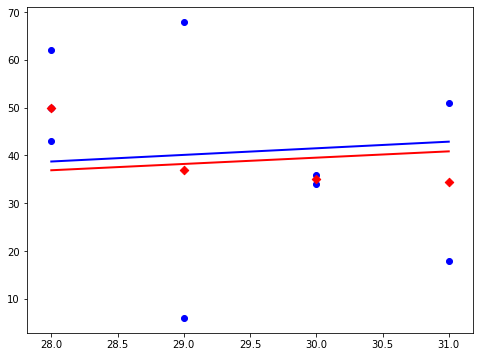

In [103]:
lm = LinearRegression(fit_intercept=False)
lm2 = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_full['age'].values.reshape(-1,1)
y = fighter_df_exam_full['Sig_Str'].values.reshape(-1,1)

#Median values of data
X2 = fighter_df_exam_med['age'].values.reshape(-1,1)
y2 = fighter_df_exam_med['Sig_Str'].values.reshape(-1,1)

#full values
lm.fit(X,y)
#median values
lm2.fit(X2,y2)


#Full values R squared
ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(y) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R_sq is ',R_sq)

#Median values R squared
ESS2 = np.sum(lm2.predict(X2) - np.mean(X2) ** 2)
#print(ESS)
RSS2 = np.sum((y2 - lm.predict(X2)) ** 2)
#print(RSS)
R_sq2 = ESS2/(ESS2+RSS2)
print('R_sq2 is', R_sq2)


print('Predictions on complete values(blue)',lm.predict(X)[0:5].reshape(1,-1))
print('Predictions on median values(red)',lm2.predict(X2)[0:5].reshape(1,-1))

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')
#Only the median values
plt.scatter(X2, y2,color='red',marker='D')
#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
#Median values
plt.plot(X2,lm2.predict(X2),color='red',linewidth=2)
plt.show()

In [104]:
#With just age and Sig Str
#[50.  37.  35.  34.5]

In [105]:
lm = LinearRegression(fit_intercept=False)
lm.fit(fighter_df_exam_full, fighter_df_exam_full['Sig_Str'])
#print(lm.predict(fighter_df_exam_full)[0:5])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [106]:
#sns.scatterplot(y="Sig_Str", x="date", data=fighter_df3)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


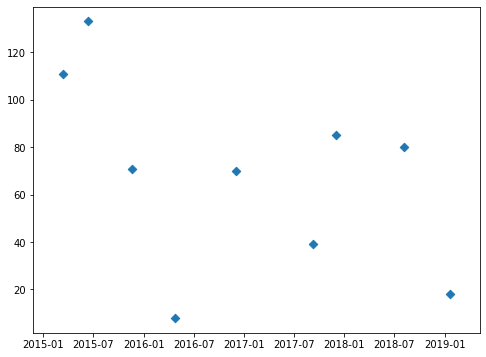

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Total_Str'],marker='D');

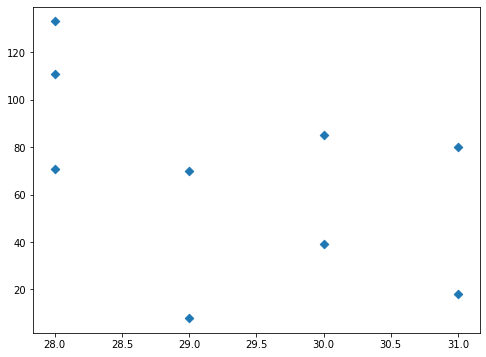

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Total_Str'],marker='D');

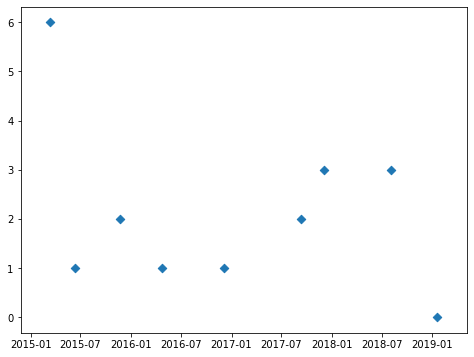

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_TD'],marker='D');

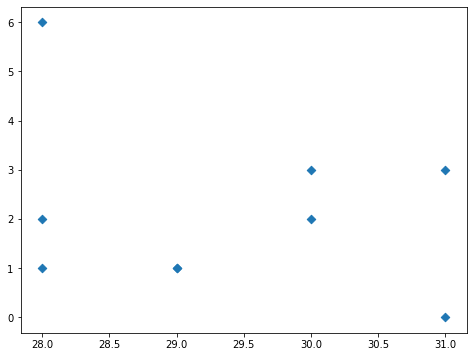

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_TD'],marker='D');

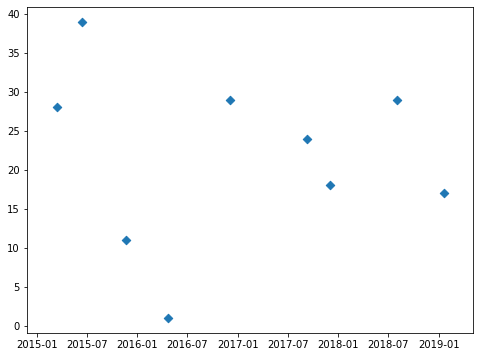

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Head'],marker='D');

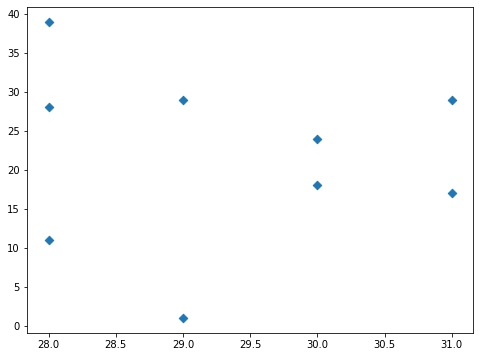

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Head'],marker='D');

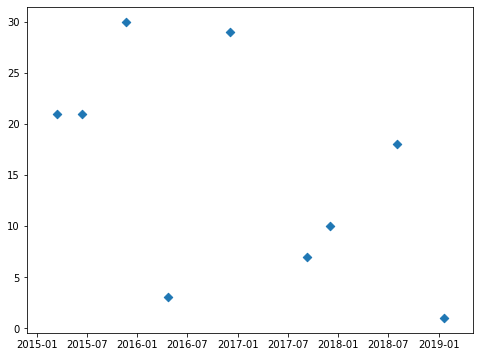

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Body'],marker='D');

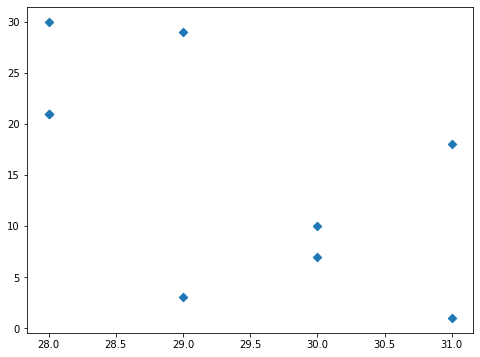

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Body'],marker='D');

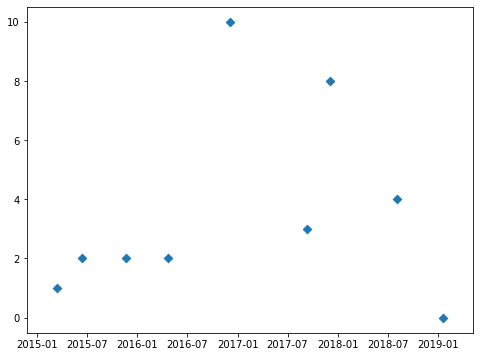

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Leg'],marker='D');

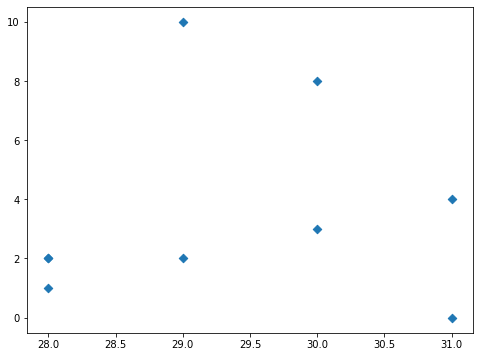

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Leg'],marker='D');

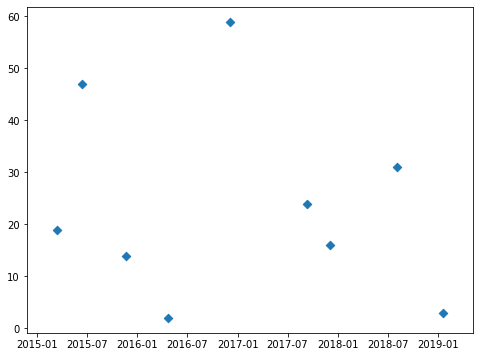

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Dist'],marker='D');

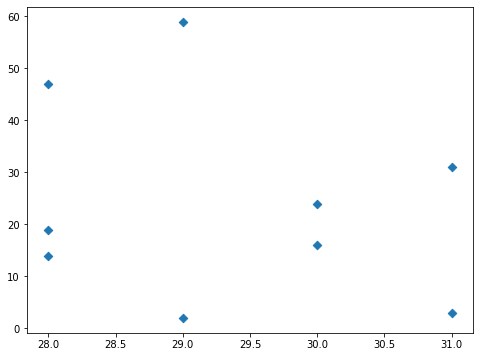

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Dist'],marker='D');

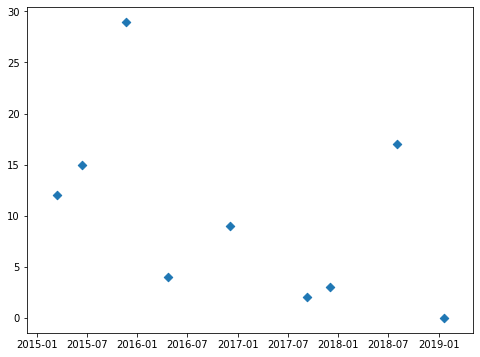

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Clinch'],marker='D');

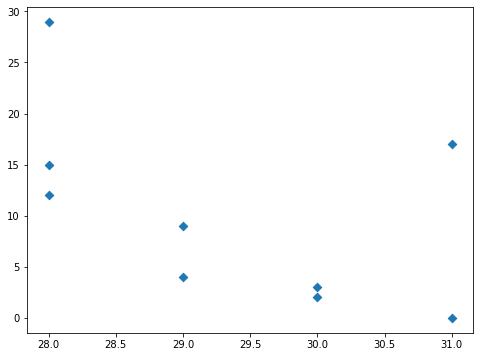

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Clinch'],marker='D');

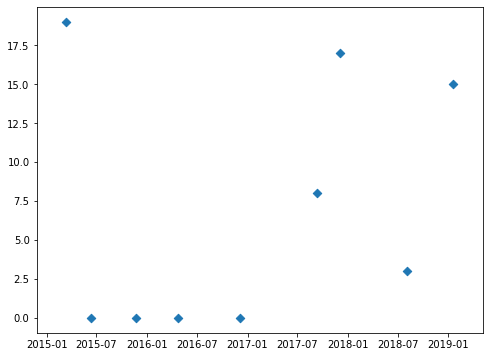

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['Num_Ground'],marker='D');

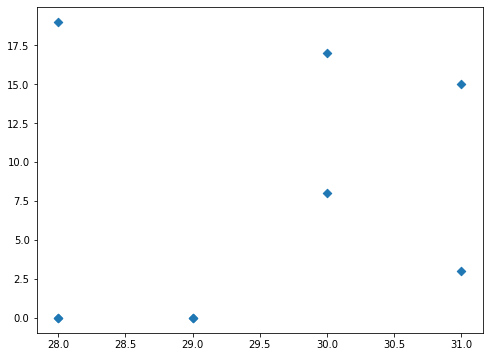

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['Num_Ground'],marker='D');

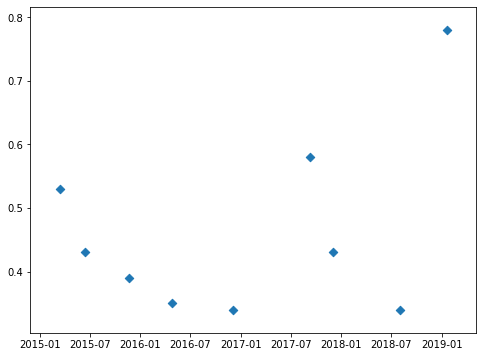

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['SIG_STR_pct'],marker='D');

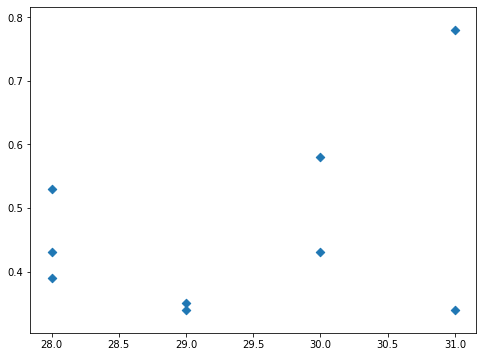

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['SIG_STR_pct'],marker='D');

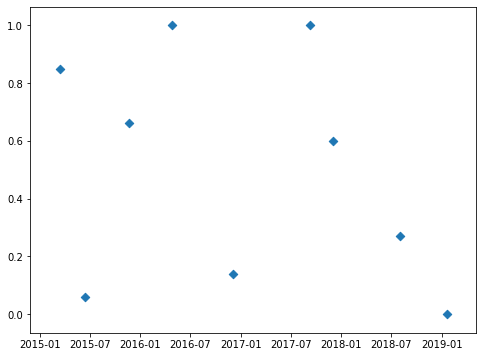

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam['date'], fighter_df_exam['TD_pct'],marker='D');

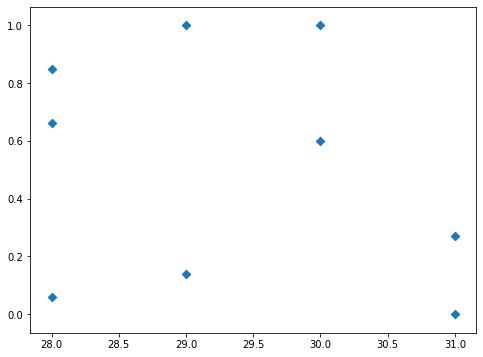

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(fighter_df_exam_full['age'], fighter_df_exam_full['TD_pct'],marker='D');

In [127]:
fighter_df3.shape
df1c.shape

(4573, 62)

In [128]:
#df1c.head().iloc[:,0:20]

In [129]:
#df1c.head().iloc[:,20:40]

In [130]:
#df1c.head().iloc[:,40:62]

In [131]:
def win_code(input1):
    if input1=='KO/TKO':
        win=0
    elif input1=='Decision':
        win=1
    else:
        win=2
    return win

#fighter_df_FlyW['win_by2'] = fighter_df_FlyW['win_by2'].apply(win_code)

In [132]:
fighter_df_FlyW = df1c.loc[df1c['weight_class']=='Flyweight']
fighter_df_FlyW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_FlyW_ML = fighter_df_FlyW.drop(columns=to_drop)
print(fighter_df_FlyW_ML.shape)
#fighter_df_FlyW_ML.head().iloc[:,0:20]

(186, 54)


In [133]:
#fighter_df_FlyW_ML.head().iloc[:,20:40]

In [134]:
#fighter_df_FlyW_ML.head().iloc[:,40:54]

In [135]:
R_age_array = one_hot(fighter_df_FlyW_ML['R_age'])
R_age_array
R_age_list = sorted(list(fighter_df_FlyW_ML['R_age'].unique()))
#print(R_age_list)
R_age_df =  pd.DataFrame(R_age_array,columns=[R_age_list])
#R_age_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [136]:
B_age_array = one_hot(fighter_df_FlyW_ML['B_age'])
B_age_array
B_age_list = sorted(list(fighter_df_FlyW_ML['B_age'].unique()))
#print(B_age_list)
B_age_df =  pd.DataFrame(B_age_array,columns=[B_age_list])
#B_age_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [137]:
#age_df = R_age_df + B_age_df
#age_df = age_df.fillna(0)
#age_df.tail()

**Random Forest Analysis**

**Flyweight**

In [138]:
from sklearn.model_selection import train_test_split

# Labels are the values we want to predict
labels = np.array(fighter_df_FlyW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_FlyW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (139, 49)
Training Labels Shape: (139, 5)
Testing Features Shape: (47, 49)
Testing Labels Shape: (47, 5)


In [139]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
KO_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(KO_errors)/len(KO_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.7021276595744681
Percent correct for Decision is  0.9361702127659575
Percent correct for KO/TKO is  0.851063829787234
Percent correct for Submission is  0.851063829787234


In [140]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: B_Total_Str          Importance: 0.11
Variable: R_Total_Str          Importance: 0.07
Variable: B_TD_pct             Importance: 0.06
Variable: R_SUB_ATT            Importance: 0.05
Variable: B_Sig_Str            Importance: 0.05
Variable: B_Num_Ground         Importance: 0.05
Variable: B_Num_Head           Importance: 0.04
Variable: PASS_Winner          Importance: 0.04
Variable: R_SIG_STR_pct        Importance: 0.03
Variable: B_SIG_STR_pct        Importance: 0.03
Variable: R_PASS               Importance: 0.03
Variable: R_Num_Leg            Importance: 0.03
Variable: Sig_Str_Winner       Importance: 0.03
Variable: R_TD_pct             Importance: 0.02
Variable: R_Sig_Str            Importance: 0.02
Variable: R_Num_TD             Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: R_Num_Body           Importance: 0.02
Variable: R_Num_Dist           Importance: 0.02
Variable: B_Num_Dist           Importance: 0.02
Variable: R_Num_Ground         Importanc

**Bantamweight**

In [141]:
fighter_df_BW = df1c.loc[df1c['weight_class']=='Bantamweight']
fighter_df_BW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_BW_ML = fighter_df_BW.drop(columns=to_drop)
print(fighter_df_BW_ML.shape)

(372, 54)


In [142]:
# Labels are the values we want to predict
labels = np.array(fighter_df_BW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_BW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (279, 49)
Training Labels Shape: (279, 5)
Testing Features Shape: (93, 49)
Testing Labels Shape: (93, 5)


In [143]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8924731182795699
Percent correct for Decision is  0.8172043010752688
Percent correct for KO/TKO is  0.8387096774193549
Percent correct for Submission is  0.9032258064516129


In [144]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: R_Total_Str          Importance: 0.14
Variable: R_SUB_ATT            Importance: 0.11
Variable: B_Total_Str          Importance: 0.11
Variable: B_KD                 Importance: 0.07
Variable: B_SUB_ATT            Importance: 0.04
Variable: SUB_ATT_Winner       Importance: 0.04
Variable: R_Sig_Str            Importance: 0.03
Variable: Sig_Str_Winner       Importance: 0.03
Variable: Num_Head_Winner      Importance: 0.03
Variable: R_KD                 Importance: 0.02
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SIG_STR_pct        Importance: 0.02
Variable: B_Sig_Str            Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: B_Num_Body           Importance: 0.02
Variable: R_Num_Body           Importance: 0.02
Variable: R_Num_Dist           Importance: 0.02
Variable: R_Num_Ground         Importance: 0.02
Variable: age_Delta            Importance: 0.02
Variable: R_TD_pct             Importanc

**Featherweight**

In [145]:
fighter_df_FW = df1c.loc[df1c['weight_class']=='Featherweight']
fighter_df_FW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_FW_ML = fighter_df_FW.drop(columns=to_drop)
print(fighter_df_FW_ML.shape)

(436, 54)


In [146]:
# Labels are the values we want to predict
labels = np.array(fighter_df_FW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_FW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (327, 49)
Training Labels Shape: (327, 5)
Testing Features Shape: (109, 49)
Testing Labels Shape: (109, 5)


In [147]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8623853211009174
Percent correct for Decision is  0.8532110091743119
Percent correct for KO/TKO is  0.8990825688073394
Percent correct for Submission is  0.926605504587156


In [148]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: B_Total_Str          Importance: 0.11
Variable: R_SUB_ATT            Importance: 0.09
Variable: R_Total_Str          Importance: 0.09
Variable: Num_Head_Winner      Importance: 0.07
Variable: B_KD                 Importance: 0.05
Variable: Sig_Str_Winner       Importance: 0.04
Variable: B_SUB_ATT            Importance: 0.03
Variable: B_PASS               Importance: 0.03
Variable: B_Num_Ground         Importance: 0.03
Variable: R_KD                 Importance: 0.02
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SIG_STR_pct        Importance: 0.02
Variable: R_TD_pct             Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: B_Num_Body           Importance: 0.02
Variable: R_Num_Body           Importance: 0.02
Variable: R_Num_Leg            Importance: 0.02
Variable: B_Num_Leg            Importance: 0.02
Variable: R_Num_Ground         Importance: 0.02
Variable: SUB_ATT_Winner       Importanc

**Lightweight**

In [149]:
fighter_df_LW = df1c.loc[df1c['weight_class']=='Lightweight']
fighter_df_LW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_LW_ML = fighter_df_LW.drop(columns=to_drop)
print(fighter_df_LW_ML.shape)

(947, 54)


In [150]:
# Labels are the values we want to predict
labels = np.array(fighter_df_LW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_LW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (710, 49)
Training Labels Shape: (710, 5)
Testing Features Shape: (237, 49)
Testing Labels Shape: (237, 5)


In [151]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8354430379746836
Percent correct for Decision is  0.869198312236287
Percent correct for KO/TKO is  0.9071729957805907
Percent correct for Submission is  0.9029535864978903


In [152]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: B_Total_Str          Importance: 0.15
Variable: R_SUB_ATT            Importance: 0.12
Variable: R_Total_Str          Importance: 0.12
Variable: R_KD                 Importance: 0.05
Variable: Sig_Str_Winner       Importance: 0.04
Variable: B_SIG_STR_pct        Importance: 0.03
Variable: R_Num_Ground         Importance: 0.03
Variable: B_KD                 Importance: 0.02
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SUB_ATT            Importance: 0.02
Variable: B_PASS               Importance: 0.02
Variable: B_Sig_Str            Importance: 0.02
Variable: B_Num_TD             Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: R_Num_Dist           Importance: 0.02
Variable: Num_Head_Winner      Importance: 0.02
Variable: SUB_ATT_Winner       Importance: 0.02
Variable: R_TD_pct             Importance: 0.01
Variable: B_TD_pct             Importance: 0.01
Variable: R_PASS               Importanc

**Welterweight**

In [153]:
fighter_df_WW = df1c.loc[df1c['weight_class']=='Welterweight']
fighter_df_WW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_WW_ML = fighter_df_WW.drop(columns=to_drop)
print(fighter_df_WW_ML.shape)

(946, 54)


In [154]:
#fighter_df_WW_ML.info()

In [155]:
print(fighter_df_WW_ML.shape)
fighter_df_WW_ML.head().iloc[:,0:20]

(946, 54)


,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_Sig_Str,B_Sig_Str,R_Total_Str,B_Total_Str,R_Num_TD,B_Num_TD,R_Num_Head,B_Num_Head
13,0,1,0.39,0.40,0.40,0.16,0,0,1,1,0,0,39,60,40,60,2,1,30,30
18,0,0,0.54,0.36,0.57,0.37,1,0,4,1,1,0,60,35,75,40,4,6,36,23
20,1,0,0.72,0.33,0.00,0.50,0,0,0,1,0,0,18,6,18,9,0,1,14,5
24,0,1,0.50,0.54,0.00,0.00,0,0,0,0,0,0,2,6,2,6,0,0,0,4
31,0,0,0.39,0.26,0.33,1.00,0,0,0,0,0,0,58,54,59,57,1,1,27,37


In [156]:
fighter_df_WW_ML.head().iloc[:,20:40]

,B_Num_Body,R_Num_Body,R_Num_Leg,B_Num_Leg,R_Num_Dist,B_Num_Dist,R_Num_Clinch,B_Num_Clinch,R_Num_Ground,B_Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_TD_Winner,Num_Head_Winner,Num_Body_Winner,Num_Leg_Winner,Num_Dist_Winner,Num_Clinch_Winner,Num_Ground_Winner,SUB_ATT_Winner
13,11,6,3,19,31,55,8,5,0,0,1,1,0,0,1,1,1,0,0,0
18,10,17,7,2,33,27,18,7,9,1,0,0,1,0,0,0,0,0,0,0
20,1,1,3,0,10,5,1,0,7,1,0,0,1,0,0,0,0,0,0,0
24,2,0,2,0,2,5,0,1,0,0,1,1,0,1,1,0,1,1,0,0
31,15,5,26,2,54,53,4,1,0,0,0,0,0,1,1,0,0,0,0,0


In [157]:
fighter_df_WW_ML.head().iloc[:,40:54]

,PASS_Winner,R_Winner,B_Winner,SIG_STR_pct_Winner,TD_pct_Winner,R_age,B_age,Decision,KO/TKO,Submission,age_Delta,R_age<B_age,R_age=B_age,R_age>B_age
13,0,0,1,1,0,27,27,1,0,0,0,0,1,0
18,0,1,0,0,0,34,26,0,0,1,8,0,0,1
20,1,1,0,0,1,27,31,0,1,0,-4,1,0,0
24,0,0,1,1,0,31,25,0,1,0,6,0,0,1
31,0,0,1,0,0,35,26,1,0,0,9,0,0,1


In [158]:
# Labels are the values we want to predict
labels = np.array(fighter_df_WW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_WW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (709, 49)
Training Labels Shape: (709, 5)
Testing Features Shape: (237, 49)
Testing Labels Shape: (237, 5)


In [159]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.869198312236287
Percent correct for Decision is  0.8481012658227848
Percent correct for KO/TKO is  0.8438818565400844
Percent correct for Submission is  0.9029535864978903


In [160]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: R_Total_Str          Importance: 0.15
Variable: B_Total_Str          Importance: 0.11
Variable: R_SUB_ATT            Importance: 0.1
Variable: B_KD                 Importance: 0.05
Variable: Num_Head_Winner      Importance: 0.05
Variable: R_KD                 Importance: 0.03
Variable: B_Num_Head           Importance: 0.03
Variable: R_Num_Ground         Importance: 0.03
Variable: Sig_Str_Winner       Importance: 0.03
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SIG_STR_pct        Importance: 0.02
Variable: B_SUB_ATT            Importance: 0.02
Variable: R_PASS               Importance: 0.02
Variable: B_PASS               Importance: 0.02
Variable: R_Sig_Str            Importance: 0.02
Variable: B_Sig_Str            Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Dist           Importance: 0.02
Variable: Total_Str_Winner     Importance: 0.02
Variable: Num_Ground_Winner    Importance: 0.02
Variable: age_Delta            Importance

In [161]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('R_Num_Head'),feature_list.index('B_Num_Head'),
                    feature_list.index('R_Total_Str'),feature_list.index('B_Total_Str'),
                    feature_list.index('R_Sig_Str'),feature_list.index('B_Sig_Str')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))

Percent correct for either Fighter is  0.8016877637130801
Percent correct for Decision is  0.8481012658227848
Percent correct for KO/TKO is  0.751054852320675
Percent correct for Submission is  0.8185654008438819


In [162]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
test2 = test_labels[:,1]
test2
pred2 = np.round(predictions[:,1])
pred2
print(confusion_matrix(test2, pred2))
#print(confusion_matrix(test_labels, predictions))

print()
print("=== Classification Report ===")
print(classification_report(test2, pred2))
#print('\n')

=== Confusion Matrix ===
[[149  17]
 [ 30  41]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       166
           1       0.71      0.58      0.64        71

    accuracy                           0.80       237
   macro avg       0.77      0.74      0.75       237
weighted avg       0.79      0.80      0.80       237



In [163]:
#blue losing is 0, blue winning is 1 in classfication report

In [164]:
#test_important.shape

In [165]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

def cv_score(clf, x, y, score_func='roc_auc'):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [166]:
from sklearn.metrics import roc_auc_score, accuracy_score

def roc_auc_score_FIXED(y_true, y_pred):
    if len(np.unique(y_true)) == 1: # bug in roc_auc_score
        return accuracy_score(y_true, np.rint(y_pred))
    return roc_auc_score(y_true, y_pred)

clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#score = cv_score(clf, Xlr, ylr)
#score = cv_score(clf, train_features, train_labels)

#print(score)

#cvscores_5 = cross_val_score(clf, features, labels, cv=5)
cvscores_5 = cross_val_score(clf, features, labels, cv=3, scoring='roc_auc')
#cvscores_5 = cross_val_score(clf, features, labels, cv=3,scoring='roc_auc_score_FIXED')
print('CV accuracy scores: %s' % cvscores_5)
print(np.mean(cvscores_5))
print()

#print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", cvscores_5.mean())


CV accuracy scores: [0.9052075  0.92177536 0.91635832]
0.9144470612882755



In [167]:
from sklearn.model_selection import RandomizedSearchCV

#Tuning hyper parameters

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
#rfc_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
#rfc_random.fit(train_features, train_labels)

# print results
#print(rfc_random.best_params_)

In [168]:
#clf = RandomForestRegressor(n_estimators = 2000, max_depth=300, max_features='auto', random_state = 42)

#score = cv_score(clf, Xlr, ylr)
#score = cv_score(clf, train_features, train_labels)

#print(score)

#cvscores_5 = cross_val_score(clf, features, labels, cv=5)
#cvscores_5 = cross_val_score(clf, features, labels, cv=3, scoring='roc_auc')
#print('CV accuracy scores: %s' % cvscores_5)
#print(np.mean(cvscores_5))
#print()



In [169]:
#cross_val_score?

**Middleweight**

In [170]:
fighter_df_MW = df1c.loc[df1c['weight_class']=='Middleweight']
fighter_df_MW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_MW_ML = fighter_df_MW.drop(columns=to_drop)
print(fighter_df_MW_ML.shape)

(696, 54)


In [171]:
# Labels are the values we want to predict
labels = np.array(fighter_df_MW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_MW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (522, 49)
Training Labels Shape: (522, 5)
Testing Features Shape: (174, 49)
Testing Labels Shape: (174, 5)


In [172]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8275862068965517
Percent correct for Decision is  0.8103448275862069
Percent correct for KO/TKO is  0.8160919540229885
Percent correct for Submission is  0.896551724137931


In [173]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: B_Total_Str          Importance: 0.15
Variable: R_SUB_ATT            Importance: 0.12
Variable: R_Total_Str          Importance: 0.08
Variable: Sig_Str_Winner       Importance: 0.07
Variable: Num_Head_Winner      Importance: 0.05
Variable: B_KD                 Importance: 0.04
Variable: B_Sig_Str            Importance: 0.03
Variable: R_Num_Head           Importance: 0.03
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SIG_STR_pct        Importance: 0.02
Variable: B_SUB_ATT            Importance: 0.02
Variable: R_Sig_Str            Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: R_Num_Leg            Importance: 0.02
Variable: B_Num_Leg            Importance: 0.02
Variable: R_Num_Dist           Importance: 0.02
Variable: R_Num_Ground         Importance: 0.02
Variable: B_Num_Ground         Importance: 0.02
Variable: R_age                Importance: 0.02
Variable: R_KD                 Importance: 0.01
Variable: R_TD_pct             Importanc

**Light Heavyweight**

In [174]:
fighter_df_LHW = df1c.loc[df1c['weight_class']=='Light Heavyweight']
fighter_df_LHW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_LHW_ML = fighter_df_LHW.drop(columns=to_drop)
print(fighter_df_LHW_ML.shape)

(479, 54)


In [175]:
# Labels are the values we want to predict
labels = np.array(fighter_df_LHW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_LHW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (359, 49)
Training Labels Shape: (359, 5)
Testing Features Shape: (120, 49)
Testing Labels Shape: (120, 5)


In [176]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8666666666666667
Percent correct for Decision is  0.85
Percent correct for KO/TKO is  0.8583333333333334
Percent correct for Submission is  0.975


In [177]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: R_Total_Str          Importance: 0.15
Variable: R_SUB_ATT            Importance: 0.11
Variable: B_Total_Str          Importance: 0.1
Variable: Total_Str_Winner     Importance: 0.06
Variable: Sig_Str_Winner       Importance: 0.04
Variable: Num_Head_Winner      Importance: 0.04
Variable: B_KD                 Importance: 0.03
Variable: B_Sig_Str            Importance: 0.03
Variable: R_KD                 Importance: 0.02
Variable: R_SIG_STR_pct        Importance: 0.02
Variable: B_SIG_STR_pct        Importance: 0.02
Variable: B_SUB_ATT            Importance: 0.02
Variable: B_PASS               Importance: 0.02
Variable: R_Sig_Str            Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: R_Num_Body           Importance: 0.02
Variable: B_Num_Dist           Importance: 0.02
Variable: R_Num_Ground         Importance: 0.02
Variable: R_TD_pct             Importance: 0.01
Variable: B_TD_pct             Importance

**Heavyweight**

In [178]:
fighter_df_HW = df1c.loc[df1c['weight_class']=='Heavyweight']
fighter_df_HW.shape
#fighter_df_FlyW.columns

to_drop=['last_round','date','Winner','date','weight_class','R_fighter','B_fighter','age','win_by2']
fighter_df_HW_ML = fighter_df_HW.drop(columns=to_drop)
print(fighter_df_HW_ML.shape)

(464, 54)


In [179]:
# Labels are the values we want to predict
labels = np.array(fighter_df_HW_ML[['R_Winner','B_Winner','Decision','KO/TKO','Submission']])

# Remove the labels from the features
# axis 1 refers to the columns
features = fighter_df_HW_ML.drop(columns=['R_Winner','B_Winner','Decision','KO/TKO','Submission'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (348, 49)
Training Labels Shape: (348, 5)
Testing Features Shape: (116, 49)
Testing Labels Shape: (116, 5)


In [180]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)

#column 1 is the blue fighter prediction
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors value of 0 is correct prediction, 1 is incorrect prediction

# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print(np.round(predictions))
#print(test_labels)
#print(B_fighter_errors)
#print(len(B_fighter_errors))
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))
#print(np.round(predictions)[:, 1])
#test_labels[:, 1]

Percent correct for either Fighter is  0.8879310344827587
Percent correct for Decision is  0.7844827586206897
Percent correct for KO/TKO is  0.8017241379310345
Percent correct for Submission is  0.9310344827586207


In [181]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#feature_importances = feature_importances[:15]

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Num_Head_Winner      Importance: 0.14
Variable: R_SUB_ATT            Importance: 0.1
Variable: R_Total_Str          Importance: 0.1
Variable: B_Total_Str          Importance: 0.09
Variable: R_SIG_STR_pct        Importance: 0.05
Variable: Sig_Str_Winner       Importance: 0.04
Variable: R_KD                 Importance: 0.03
Variable: B_KD                 Importance: 0.03
Variable: B_SIG_STR_pct        Importance: 0.03
Variable: B_Sig_Str            Importance: 0.03
Variable: R_Sig_Str            Importance: 0.02
Variable: R_Num_Head           Importance: 0.02
Variable: B_Num_Head           Importance: 0.02
Variable: R_Num_Leg            Importance: 0.02
Variable: R_Num_Dist           Importance: 0.02
Variable: B_Num_Dist           Importance: 0.02
Variable: R_Num_Ground         Importance: 0.02
Variable: Total_Str_Winner     Importance: 0.02
Variable: R_age                Importance: 0.02
Variable: R_TD_pct             Importance: 0.01
Variable: B_TD_pct             Importance:

In [182]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('Num_Head_Winner'),feature_list.index('R_Sig_Str'),
                    feature_list.index('R_Total_Str'),feature_list.index('B_Total_Str'),feature_list.index('B_Sig_Str'),
                    feature_list.index('Sig_Str_Winner')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels[:, 4])

#errors
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))

# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')mape = np.mean(100 * (errors / test_labels))
#accuracy = 100 - mapeprint('Accuracy:', round(accuracy, 2), '%.')


Percent correct for either Fighter is  0.8362068965517242
Percent correct for Decision is  0.7413793103448276
Percent correct for KO/TKO is  0.6637931034482758
Percent correct for Submission is  0.8706896551724138


In [183]:
#feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
#print(feature_importances)
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#feature_importances[:5]

In [184]:
print(feature_list.index('Num_Head_Winner'))
print(feature_list.index('R_SUB_ATT'))
important_indices

33
6


[33, 12, 14, 15, 13, 30]

In [185]:
#train_features

In [186]:
#train_important

**Welterweight Regression Analysis**

In [187]:
fighter_name='Colby Covington'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(10, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
1999,Colby Covington,0,11 of 17,0.64,66 of 88,2 of 2,1.00,0,8,0,9 of 15,2 of 2,0 of 0,2 of 2,0 of 0,9 of 15,KO/TKO,1,4:50,3 Rnd (5-5-5)
1889,Colby Covington,0,23 of 62,0.37,97 of 155,5 of 12,0.41,1,6,0,13 of 44,7 of 15,3 of 3,13 of 47,5 of 8,5 of 7,Submission,3,3:26,3 Rnd (5-5-5)
1673,Colby Covington,0,26 of 51,0.50,95 of 129,2 of 10,0.20,0,2,0,23 of 48,1 of 1,2 of 2,6 of 23,4 of 6,16 of 22,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
1421,Colby Covington,0,2 of 2,1.00,2 of 2,1 of 2,0.50,0,1,0,2 of 2,0 of 0,0 of 0,0 of 0,1 of 1,1 of 1,Submission,1,1:26,3 Rnd (5-5-5)
1232,Colby Covington,1,19 of 34,0.55,78 of 107,5 of 9,0.55,1,6,0,17 of 31,2 of 3,0 of 0,3 of 7,0 of 0,16 of 27,Submission,3,0:54,3 Rnd (5-5-5)
1150,Colby Covington,0,26 of 46,0.56,161 of 216,6 of 9,0.66,0,12,0,19 of 38,6 of 7,1 of 1,14 of 28,1 of 1,11 of 17,KO/TKO,3,2:18,3 Rnd (5-5-5)
978,Colby Covington,0,76 of 141,0.53,96 of 167,12 of 17,0.70,0,3,0,56 of 117,12 of 16,8 of 8,59 of 123,10 of 11,7 of 7,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
808,Colby Covington,0,47 of 105,0.44,92 of 154,8 of 15,0.53,0,1,0,18 of 59,12 of 23,17 of 23,27 of 69,18 of 34,2 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
669,Colby Covington,0,88 of 317,0.27,121 of 351,0 of 0,0.00,0,0,0,65 of 286,1 of 4,22 of 27,81 of 304,4 of 8,3 of 5,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
416,Colby Covington,0,99 of 296,0.33,142 of 346,7 of 18,0.38,0,2,0,54 of 229,14 of 33,31 of 34,90 of 278,8 of 16,1 of 2,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5)


In [188]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(10, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
1999,0,0.64,1.00,0,8,0,1,11,66,2,9,2,0,2,0,9,1,1,1,26
1889,0,0.37,0.41,1,6,0,3,23,97,5,13,7,3,13,5,5,1,1,1,26
1673,0,0.50,0.20,0,2,0,3,26,95,2,23,1,2,6,4,16,1,1,1,27
1421,0,1.00,0.50,0,1,0,1,2,2,1,2,0,0,0,1,1,0,0,1,27
1232,1,0.55,0.55,1,6,0,3,19,78,5,17,2,0,3,0,16,0,0,0,28
1150,0,0.56,0.66,0,12,0,3,26,161,6,19,6,1,14,1,11,0,0,0,28
978,0,0.53,0.70,0,3,0,3,76,96,12,56,12,8,59,10,7,1,0,1,28
808,0,0.44,0.53,0,1,0,3,47,92,8,18,12,17,27,18,2,1,1,0,29
669,0,0.27,0.00,0,0,0,3,88,121,0,65,1,22,81,4,3,1,1,1,29
416,0,0.33,0.38,0,2,0,5,99,142,7,54,14,31,90,8,1,0,1,0,30


R square is  0.1080830261531011
Predictions on Y values [39.99715909 41.53551136 43.07386364 44.61221591]
Age values are [26 27 28 29]
Coefficent is  [[1.53835227]]
Intercept is  0.0


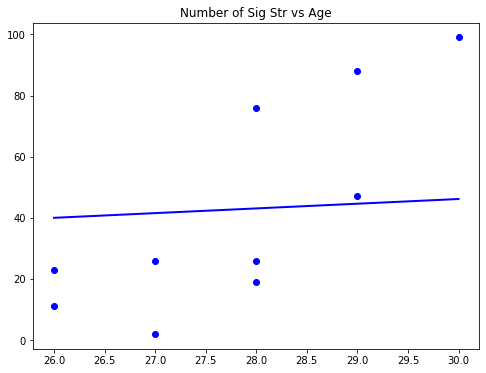

In [189]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

In [190]:
#print(lm.coef_)
#print(lm.intercept_)

R square is  0.6044491397343408
Predictions on Y values [89.55630165 93.00077479 96.44524793 99.88972107]
Age values are [26 27 28 29]
Coefficent is  [[3.44447314]]
Intercept is  0.0


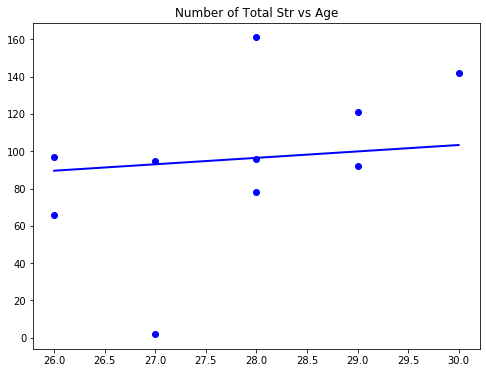

In [191]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.002693561549391598
Predictions on Y values [26.35588843 27.36957645 28.38326446 29.39695248]
Age values are [26 27 28 29]
Coefficent is  [[1.01368802]]
Intercept is  0.0


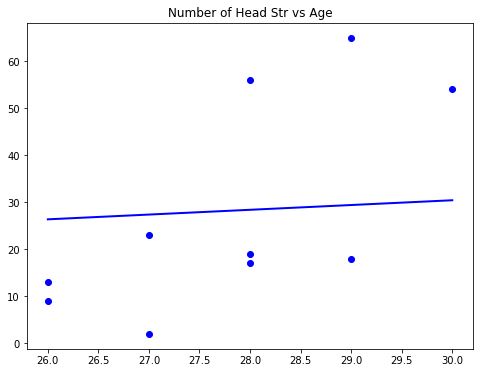

In [192]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

[[ 9]
 [13]
 [23]
 [ 2]
 [17]
 [19]
 [56]
 [18]
 [65]
 [54]]
10

[[26.35588843]
 [26.35588843]
 [27.36957645]
 [27.36957645]
 [28.38326446]
 [28.38326446]
 [28.38326446]
 [29.39695248]
 [29.39695248]]
[-25.36957645 -17.35588843 -13.35588843 -11.39695248 -11.38326446
  -9.38326446  -4.36957645  23.5893595   27.61673554  35.60304752]
[26 27 28 29 30]
[26.35588843 27.36957645 28.38326446]


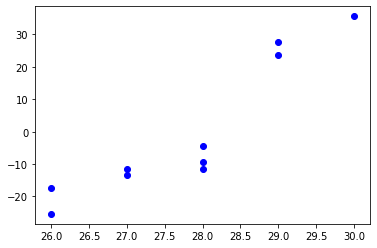

In [193]:
#Residuals chart
print(y)
print(len(y))
print()
print(lm.predict(X)[0:9].reshape(-1,1))

resid = y-lm.predict(X).reshape(-1,1)
resid = np.unique(resid)[0:len(y)]

print(resid)
print(np.unique(X))
print(np.unique(lm.predict(X)[0:5].reshape(1,-1)))
plt.scatter(X, resid,color='blue')
plt.show()

In [194]:
fighter_name='Robbie Lawler'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(19, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
4466,Robbie Lawler,1,64 of 153,0.41,87 of 176,6 of 8,0.75,0,0,0,52 of 137,9 of 11,3 of 5,34 of 94,21 of 41,9 of 18,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
4457,Robbie Lawler,1,28 of 51,0.54,39 of 62,1 of 1,1.00,0,1,0,16 of 39,12 of 12,0 of 0,3 of 14,17 of 23,8 of 14,KO/TKO,2,0:27,3 Rnd (5-5-5)
4435,Robbie Lawler,1,5 of 11,0.45,5 of 11,0 of 0,0.00,0,0,0,5 of 11,0 of 0,0 of 0,4 of 9,0 of 0,1 of 2,KO/TKO,1,1:29,3 Rnd (5-5-5)
4416,Robbie Lawler,0,15 of 25,0.60,24 of 34,2 of 2,1.00,0,3,0,3 of 11,11 of 13,1 of 1,1 of 5,12 of 16,2 of 4,Submission,2,2:28,3 Rnd (5-5-5)
4395,Robbie Lawler,1,30 of 72,0.41,51 of 93,3 of 4,0.75,0,2,1,23 of 64,5 of 6,2 of 2,13 of 40,5 of 7,12 of 25,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
4379,Robbie Lawler,0,16 of 64,0.25,18 of 66,0 of 0,0.00,0,0,0,13 of 60,3 of 4,0 of 0,14 of 58,2 of 6,0 of 0,KO/TKO,2,1:31,3 Rnd (5-5-5)
2599,Robbie Lawler,0,9 of 15,0.60,16 of 22,0 of 0,0.00,0,0,0,7 of 13,2 of 2,0 of 0,0 of 4,2 of 2,7 of 9,KO/TKO,1,3:57,3 Rnd (5-5-5)
2463,Robbie Lawler,1,28 of 46,0.60,32 of 51,1 of 1,1.00,0,1,0,22 of 39,5 of 6,1 of 1,21 of 37,6 of 7,1 of 2,KO/TKO,2,0:24,3 Rnd (5-5-5)
2327,Robbie Lawler,1,44 of 102,0.43,65 of 126,0 of 0,0.00,0,2,1,25 of 75,5 of 9,14 of 18,32 of 77,3 of 7,9 of 18,Decision - Split,3,5:00,3 Rnd (5-5-5)
2197,Robbie Lawler,0,150 of 331,0.45,162 of 343,0 of 0,0.00,0,0,0,141 of 320,5 of 6,4 of 5,146 of 321,4 of 10,0 of 0,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5)


In [195]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(19, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
4466,1,0.41,0.75,0,0,0,3,64,87,6,52,9,3,34,21,9,0,1,0,20
4457,1,0.54,1.00,0,1,0,2,28,39,1,16,12,0,3,17,8,0,0,0,20
4435,1,0.45,0.00,0,0,0,1,5,5,0,5,0,0,4,0,1,1,1,0,20
4416,0,0.60,1.00,0,3,0,2,15,24,2,3,11,1,1,12,2,0,0,1,21
4395,1,0.41,0.75,0,2,1,3,30,51,3,23,5,2,13,5,12,1,1,0,21
4379,0,0.25,0.00,0,0,0,2,16,18,0,13,3,0,14,2,0,0,0,0,22
2599,0,0.60,0.00,0,0,0,1,9,16,0,7,2,0,0,2,7,1,1,1,30
2463,1,0.60,1.00,0,1,0,2,28,32,1,22,5,1,21,6,1,0,0,0,31
2327,1,0.43,0.00,0,2,1,3,44,65,0,25,5,14,32,3,9,1,1,1,31
2197,0,0.45,0.00,0,0,0,5,150,162,0,141,5,4,146,4,0,0,0,0,31


R square is  0.23375658426968446
Predictions on Y values [37.48378886 39.3579783  41.23216775 56.22568329 58.09987273]
Age values are [20 21 22 30 31]
Coefficent is  [[1.87418944]]
Intercept is  0.0


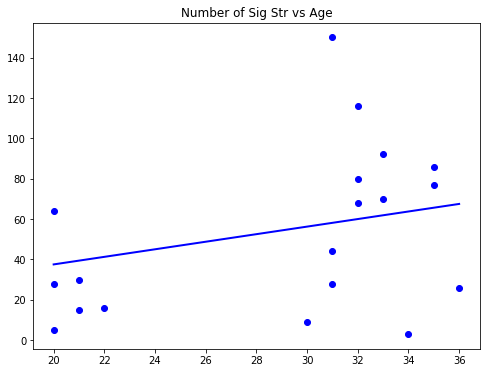

In [196]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

R square is  0.3015246836924679
Predictions on Y values [46.17295921 48.48160718 50.79025514 69.25943882 71.56808678]
Age values are [20 21 22 30 31]
Coefficent is  [[2.30864796]]
Intercept is  0.0


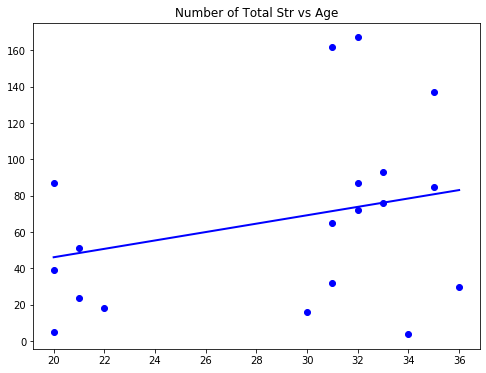

In [197]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.10423988435170836
Predictions on Y values [28.70129083 30.13635537 31.57141991 43.05193625 44.48700079]
Age values are [20 21 22 30 31]
Coefficent is  [[1.43506454]]
Intercept is  0.0


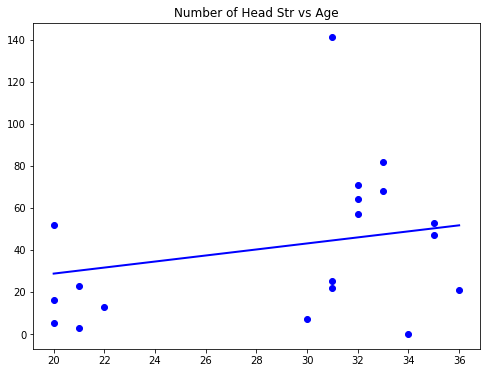

In [198]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

In [199]:
fighter_name='Vicente Luque'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(11, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
1595,Vicente Luque,0,28 of 57,0.49,50 of 79,0 of 0,0.00,1,0,0,13 of 35,12 of 18,3 of 4,16 of 40,3 of 4,9 of 13,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
1413,Vicente Luque,0,12 of 26,0.46,12 of 26,0 of 0,0.00,1,0,0,6 of 20,3 of 3,3 of 3,12 of 26,0 of 0,0 of 0,Submission,1,2:13,3 Rnd (5-5-5)
1222,Vicente Luque,0,25 of 54,0.46,51 of 87,4 of 5,0.80,1,4,0,14 of 38,3 of 6,8 of 10,13 of 31,2 of 3,10 of 20,Submission,2,3:52,3 Rnd (5-5-5)
1101,Vicente Luque,1,11 of 22,0.50,11 of 22,0 of 0,0.00,0,0,0,11 of 22,0 of 0,0 of 0,8 of 18,3 of 4,0 of 0,KO/TKO,1,1:00,3 Rnd (5-5-5)
1054,Vicente Luque,1,9 of 21,0.42,9 of 21,0 of 0,0.00,0,0,0,5 of 16,2 of 3,2 of 2,5 of 17,0 of 0,4 of 4,KO/TKO,1,1:19,3 Rnd (5-5-5)
895,Vicente Luque,0,24 of 44,0.54,44 of 64,2 of 7,0.28,0,3,0,13 of 30,7 of 9,4 of 5,21 of 41,2 of 2,1 of 1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
674,Vicente Luque,1,61 of 113,0.53,61 of 113,0 of 0,0.00,1,0,0,39 of 86,3 of 6,19 of 21,57 of 104,1 of 1,3 of 8,Submission,2,4:08,3 Rnd (5-5-5)
449,Vicente Luque,1,14 of 35,0.40,14 of 35,0 of 0,0.00,0,0,0,9 of 26,1 of 3,4 of 6,10 of 30,1 of 1,3 of 4,KO/TKO,1,4:16,3 Rnd (5-5-5)
294,Vicente Luque,1,41 of 64,0.64,41 of 64,0 of 0,0.00,0,0,0,25 of 48,2 of 2,14 of 14,31 of 51,2 of 4,8 of 9,KO/TKO,1,3:52,3 Rnd (5-5-5)
146,Vicente Luque,1,163 of 241,0.67,164 of 242,0 of 0,0.00,2,1,1,132 of 209,17 of 17,14 of 15,140 of 216,16 of 17,7 of 8,KO/TKO,3,4:54,3 Rnd (5-5-5)


In [200]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(11, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
1595,0,0.49,0.00,1,0,0,3,28,50,0,13,12,3,16,3,9,1,0,1,23
1413,0,0.46,0.00,1,0,0,1,12,12,0,6,3,3,12,0,0,0,0,0,24
1222,0,0.46,0.80,1,4,0,2,25,51,4,14,3,8,13,2,10,0,0,0,24
1101,1,0.50,0.00,0,0,0,1,11,11,0,11,0,0,8,3,0,0,0,0,24
1054,1,0.42,0.00,0,0,0,1,9,9,0,5,2,2,5,0,4,0,0,0,24
895,0,0.54,0.28,0,3,0,3,24,44,2,13,7,4,21,2,1,0,0,0,25
674,1,0.53,0.00,1,0,0,2,61,61,0,39,3,19,57,1,3,0,0,0,25
449,1,0.40,0.00,0,0,0,1,14,14,0,9,1,4,10,1,3,0,0,0,26
294,1,0.64,0.00,0,0,0,1,41,41,0,25,2,14,31,2,8,0,0,0,26
146,1,0.67,0.00,2,1,1,3,163,164,0,132,17,14,140,16,7,1,1,1,27


R square is  0.04323077446354766
Predictions on Y values [34.88205426 36.39866531 37.91527637 39.43188742]
Age values are [23 24 25 26]
Coefficent is  [[1.51661105]]
Intercept is  0.0


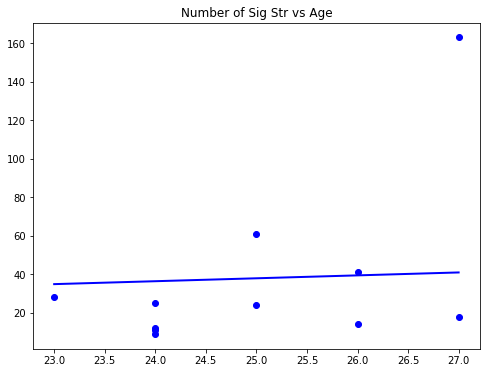

In [201]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

R square is  0.08781725118960654
Predictions on Y values [40.41099666 42.16799652 43.92499637 45.68199623]
Age values are [23 24 25 26]
Coefficent is  [[1.75699985]]
Intercept is  0.0


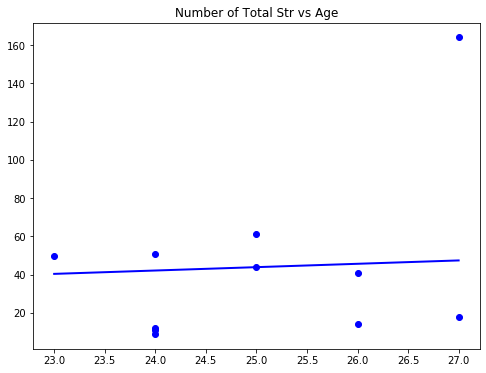

In [202]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.0016693595052571597
Predictions on Y values [24.32134049 25.37879008 26.43623966 27.49368925]
Age values are [23 24 25 26]
Coefficent is  [[1.05744959]]
Intercept is  0.0


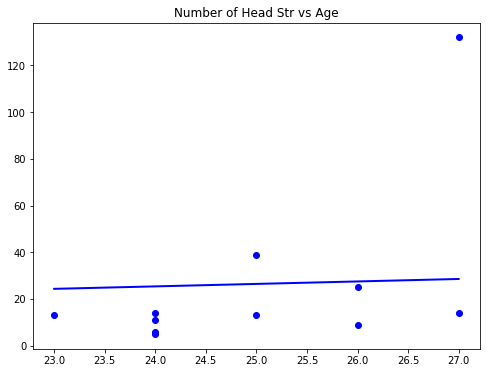

In [203]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

In [204]:
fighter_name='Mike Perry'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(10, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
1145,Mike Perry,3,31 of 50,0.62,50 of 69,0 of 0,0.00,0,3,0,21 of 38,3 of 5,7 of 7,16 of 27,0 of 1,15 of 22,KO/TKO,1,3:38,3 Rnd (5-5-5)
1077,Mike Perry,1,90 of 214,0.42,103 of 228,0 of 0,0.00,0,5,0,78 of 195,5 of 12,7 of 7,57 of 162,15 of 31,18 of 21,KO/TKO,3,4:40,3 Rnd (5-5-5)
975,Mike Perry,0,37 of 90,0.41,37 of 90,0 of 0,0.00,0,0,0,22 of 70,5 of 10,10 of 10,35 of 85,2 of 5,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
860,Mike Perry,2,26 of 55,0.47,28 of 57,0 of 0,0.00,0,0,0,10 of 32,4 of 10,12 of 13,24 of 51,2 of 3,0 of 1,KO/TKO,2,1:05,3 Rnd (5-5-5)
707,Mike Perry,1,11 of 18,0.61,11 of 18,0 of 0,0.00,0,0,0,10 of 17,0 of 0,1 of 1,4 of 11,6 of 6,1 of 1,KO/TKO,1,1:19,3 Rnd (5-5-5)
592,Mike Perry,0,51 of 136,0.37,51 of 136,1 of 1,1.00,0,0,0,34 of 112,12 of 18,5 of 6,51 of 135,0 of 1,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
516,Mike Perry,0,45 of 110,0.40,45 of 110,1 of 4,0.25,0,1,0,23 of 77,8 of 18,14 of 15,44 of 108,1 of 2,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
387,Mike Perry,0,62 of 110,0.56,66 of 114,2 of 3,0.66,0,0,0,34 of 78,15 of 18,13 of 14,42 of 86,17 of 21,3 of 3,Decision - Split,3,5:00,3 Rnd (5-5-5)
258,Mike Perry,0,11 of 20,0.55,11 of 20,1 of 1,1.00,0,1,0,0 of 9,6 of 6,5 of 5,4 of 13,6 of 6,1 of 1,Submission,1,4:46,3 Rnd (5-5-5)
50,Mike Perry,0,65 of 110,0.59,75 of 120,0 of 1,0.00,0,1,0,48 of 90,6 of 8,11 of 12,32 of 72,18 of 19,15 of 19,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)


In [205]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(10, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
1145,3,0.62,0.00,0,3,0,1,31,50,0,21,3,7,16,0,15,1,1,1,24
1077,1,0.42,0.00,0,5,0,3,90,103,0,78,5,7,57,15,18,1,1,1,25
975,0,0.41,0.00,0,0,0,3,37,37,0,22,5,10,35,2,0,0,0,0,25
860,2,0.47,0.00,0,0,0,2,26,28,0,10,4,12,24,2,0,1,1,0,25
707,1,0.61,0.00,0,0,0,1,11,11,0,10,0,1,4,6,1,0,0,0,26
592,0,0.37,1.00,0,0,0,3,51,51,1,34,12,5,51,0,0,0,0,0,26
516,0,0.40,0.25,0,1,0,3,45,45,1,23,8,14,44,1,0,1,1,1,26
387,0,0.56,0.66,0,0,0,3,62,66,2,34,15,13,42,17,3,1,1,1,26
258,0,0.55,1.00,0,1,0,1,11,11,1,0,6,5,4,6,1,1,1,1,27
50,0,0.59,0.00,0,1,0,3,65,75,0,48,6,11,32,18,15,1,1,1,27


R square is  0.16997277110300552
Predictions on Y values [39.97580523 41.64146378 43.30712233 44.97278089]
Age values are [24 25 26 27]
Coefficent is  [[1.66565855]]
Intercept is  0.0


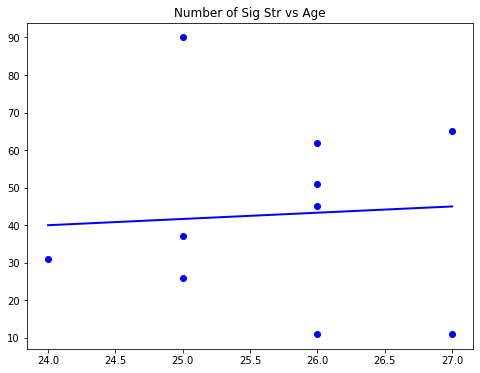

In [206]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

R square is  0.20037570324811435
Predictions on Y values [44.34900953 46.19688492 48.04476032 49.89263572]
Age values are [24 25 26 27]
Coefficent is  [[1.8478754]]
Intercept is  0.0


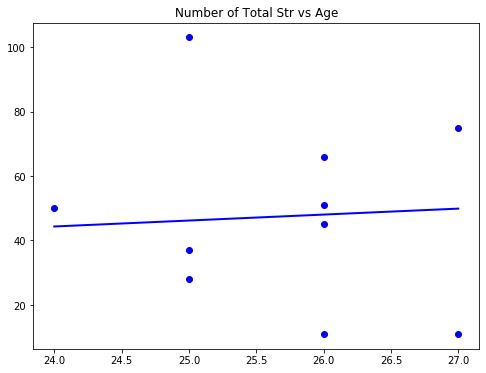

In [207]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.005387792011680616
Predictions on Y values [26.04324815 27.12838349 28.21351883 29.29865417]
Age values are [24 25 26 27]
Coefficent is  [[1.08513534]]
Intercept is  0.0


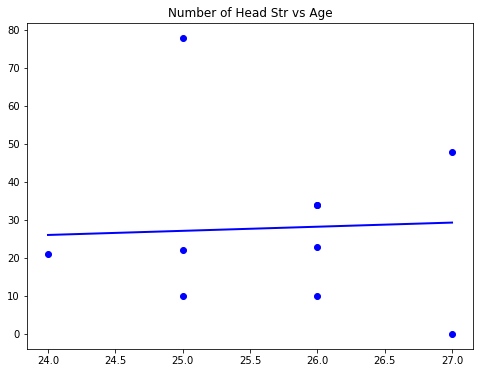

In [208]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

In [209]:
fighter_name='Tim Means'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(14, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
2136,Tim Means,0,30 of 66,0.45,53 of 89,3 of 4,0.75,1,0,0,18 of 46,5 of 13,7 of 7,15 of 46,8 of 10,7 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
2016,Tim Means,0,85 of 210,0.40,85 of 211,1 of 4,0.25,0,0,0,44 of 144,25 of 48,16 of 18,80 of 199,5 of 11,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
1835,Tim Means,0,43 of 68,0.63,53 of 79,1 of 2,0.50,0,0,0,24 of 42,9 of 16,10 of 10,34 of 56,3 of 5,6 of 7,Decision - Split,3,5:00,3 Rnd (5-5-5)
1759,Tim Means,2,23 of 42,0.54,25 of 47,0 of 0,0.00,0,0,0,16 of 31,5 of 9,2 of 2,11 of 28,10 of 11,2 of 3,KO/TKO,1,2:17,3 Rnd (5-5-5)
1714,Tim Means,1,48 of 130,0.36,69 of 151,2 of 2,1.00,1,2,0,28 of 89,12 of 32,8 of 9,30 of 100,9 of 14,9 of 16,Submission,3,3:41,3 Rnd (5-5-5)
1608,Tim Means,0,16 of 40,0.40,24 of 48,0 of 2,0.00,0,0,0,13 of 32,3 of 8,0 of 0,14 of 36,2 of 4,0 of 0,Submission,1,4:44,3 Rnd (5-5-5)
1439,Tim Means,1,37 of 70,0.52,43 of 76,0 of 0,0.00,0,0,0,22 of 49,11 of 17,4 of 4,35 of 67,1 of 2,1 of 1,KO/TKO,2,0:21,3 Rnd (5-5-5)
1146,Tim Means,0,71 of 118,0.60,82 of 130,0 of 0,0.00,0,0,0,57 of 101,12 of 15,2 of 2,54 of 92,17 of 26,0 of 0,KO/TKO,2,2:56,3 Rnd (5-5-5)
901,Tim Means,0,9 of 12,0.75,34 of 41,0 of 1,0.00,0,1,0,8 of 11,1 of 1,0 of 0,0 of 2,5 of 5,4 of 5,Submission,2,2:38,3 Rnd (5-5-5)
799,Tim Means,0,64 of 174,0.36,76 of 186,0 of 0,0.00,0,0,0,31 of 129,26 of 38,7 of 7,63 of 173,1 of 1,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)


In [210]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(14, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
2136,0,0.45,0.75,1,0,0,3,30,53,3,18,5,7,15,8,7,1,1,1,30
2016,0,0.40,0.25,0,0,0,3,85,85,1,44,25,16,80,5,0,1,1,0,30
1835,0,0.63,0.50,0,0,0,3,43,53,1,24,9,10,34,3,6,1,0,0,30
1759,2,0.54,0.00,0,0,0,1,23,25,0,16,5,2,11,10,2,1,1,1,31
1714,1,0.36,1.00,1,2,0,3,48,69,2,28,12,8,30,9,9,1,1,1,31
1608,0,0.40,0.00,0,0,0,1,16,24,0,13,3,0,14,2,0,0,0,0,31
1439,1,0.52,0.00,0,0,0,2,37,43,0,22,11,4,35,1,1,0,0,0,31
1146,0,0.60,0.00,0,0,0,2,71,82,0,57,12,2,54,17,0,0,0,0,32
901,0,0.75,0.00,0,1,0,2,9,34,0,8,1,0,0,5,4,0,1,0,33
799,0,0.36,0.00,0,0,0,3,64,76,0,31,26,7,63,1,0,0,0,0,33


R square is  0.11583555087966001
Predictions on Y values [46.6745893  48.23040895 49.78622859 51.34204823]
Age values are [30 31 32 33]
Coefficent is  [[1.55581964]]
Intercept is  0.0


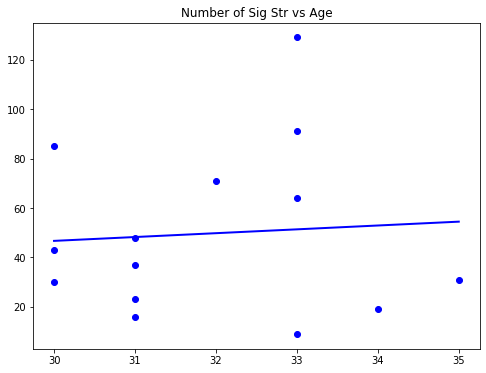

In [211]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

R square is  0.2578303065595223
Predictions on Y values [55.87067459 57.73303041 59.59538623 61.45774205]
Age values are [30 31 32 33]
Coefficent is  [[1.86235582]]
Intercept is  0.0


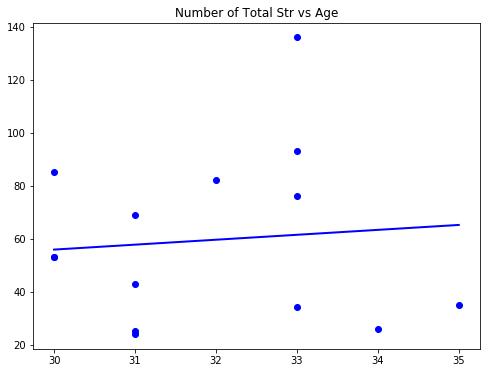

In [212]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.0027895848204637966
Predictions on Y values [29.95386229 30.95232436 31.95078644 32.94924851]
Age values are [30 31 32 33]
Coefficent is  [[0.99846208]]
Intercept is  0.0


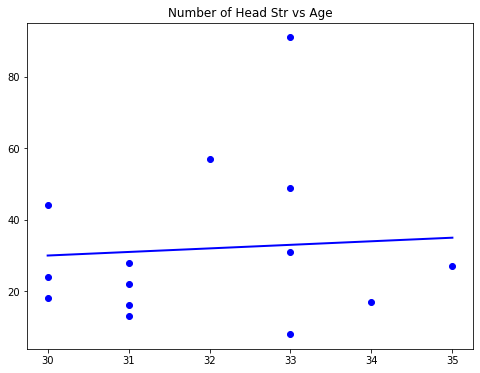

In [213]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

In [214]:
fighter_name='Thiago Alves'
wt_class='Welterweight'

#This data frame is for one fighter and their respective weight class

fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]

#fighter_df_exam = fighter_df3.loc[fighter_df3['fighter']==fighter_name]
#fighter_df_exam = fighter_df_exam.loc[fighter_df_exam['weight_class']==wt_class]
fighter_df_exam_WW.sort_values('date', inplace=True)
print(fighter_df_exam_WW.shape)
fighter_df_exam_WW.iloc[:,0:20]

(25, 39)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,fighter,KD,SIG_STR.,SIG_STR_pct,TOTAL_STR.,TD,TD_pct,SUB_ATT,PASS,REV,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND,win_by,last_round,last_round_time,Format
4299,Thiago Alves,0,19 of 53,0.35,84 of 135,3 of 3,1.00,0,4,0,12 of 44,5 of 5,2 of 4,4 of 16,6 of 9,9 of 28,Submission,2,4:43,3 Rnd (5-5-5)
4279,Thiago Alves,0,8 of 11,0.72,9 of 12,1 of 1,1.00,0,2,0,5 of 8,2 of 2,1 of 1,2 of 2,2 of 2,4 of 7,KO/TKO,1,2:25,3 Rnd (5-5-5)
4238,Thiago Alves,1,11 of 27,0.40,19 of 36,0 of 0,0.00,0,0,0,5 of 17,4 of 5,2 of 5,5 of 19,4 of 6,2 of 2,KO/TKO,1,2:54,3 Rnd (5-5-5)
4209,Thiago Alves,0,1 of 1,1.00,2 of 2,1 of 1,1.00,3,0,0,0 of 0,0 of 0,1 of 1,1 of 1,0 of 0,0 of 0,KO/TKO,2,4:37,3 Rnd (5-5-5)
4165,Thiago Alves,0,63 of 142,0.44,84 of 164,0 of 0,0.00,0,0,0,27 of 95,11 of 13,25 of 34,41 of 104,15 of 23,7 of 15,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
4120,Thiago Alves,2,26 of 49,0.53,41 of 65,0 of 0,0.00,1,3,0,26 of 48,0 of 0,0 of 1,3 of 8,0 of 0,23 of 41,KO/TKO,2,1:10,3 Rnd (5-5-5)
3998,Thiago Alves,0,48 of 97,0.49,50 of 101,0 of 0,0.00,0,1,0,28 of 72,2 of 3,18 of 22,28 of 68,14 of 17,6 of 12,KO/TKO,2,4:04,3 Rnd (5-5-5)
3969,Thiago Alves,1,39 of 90,0.43,48 of 99,0 of 0,0.00,0,0,0,14 of 59,7 of 9,18 of 22,28 of 69,9 of 18,2 of 3,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5)
3899,Thiago Alves,1,17 of 48,0.35,17 of 48,0 of 0,0.00,0,0,0,12 of 43,2 of 2,3 of 3,12 of 43,2 of 2,3 of 3,KO/TKO,2,0:24,3 Rnd (5-5-5)
3864,Thiago Alves,1,10 of 16,0.62,24 of 31,1 of 1,1.00,0,1,0,8 of 14,2 of 2,0 of 0,3 of 6,2 of 2,5 of 8,KO/TKO,2,1:02,3 Rnd (5-5-5)


In [215]:
#This data takes the fighter df exam and drops any columns that are not usable for linear regression

to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
print(fighter_df_exam_WW_full.shape)
fighter_df_exam_WW_full.iloc[:,0:20]

(25, 20)


,KD,SIG_STR_pct,TD_pct,SUB_ATT,PASS,REV,last_round,Sig_Str,Total_Str,Num_TD,Num_Head,Num_Body,Num_Leg,Num_Dist,Num_Clinch,Num_Ground,Sig_Str_Winner,Total_Str_Winner,Num_Ground_Winner,age
4299,0,0.35,1.00,0,4,0,2,19,84,3,12,5,2,4,6,9,1,1,1,22
4279,0,0.72,1.00,0,2,0,1,8,9,1,5,2,1,2,2,4,0,0,0,22
4238,1,0.40,0.00,0,0,0,1,11,19,0,5,4,2,5,4,2,1,1,0,22
4209,0,1.00,1.00,3,0,0,2,1,2,1,0,0,1,1,0,0,0,0,0,22
4165,0,0.44,0.00,0,0,0,3,63,84,0,27,11,25,41,15,7,0,0,0,23
4120,2,0.53,0.00,1,3,0,2,26,41,0,26,0,0,3,0,23,0,0,0,23
3998,0,0.49,0.00,0,1,0,2,48,50,0,28,2,18,28,14,6,0,0,0,23
3969,1,0.43,0.00,0,0,0,2,39,48,0,14,7,18,28,9,2,1,1,0,24
3899,1,0.35,0.00,0,0,0,2,17,17,0,12,2,3,12,2,3,0,1,0,24
3864,1,0.62,1.00,0,1,0,2,10,24,1,8,2,0,3,2,5,0,0,1,24


R square is  0.03864344974714585
Predictions on Y values [35.24941725 36.85166349 38.45390973 40.05615597 41.6584022  43.26064844
 44.86289468 48.06738716 49.6696334  52.87412587 54.47637211 56.07861835]
Age values are [22 23 24 25 26 27 28 30 31 33 34 35]
Coefficent is  [[1.60224624]]
Intercept is  0.0


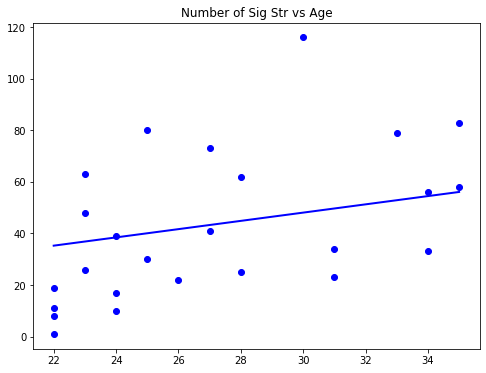

In [216]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)

size1=len(X)
#print(size1)

lm.fit(X,y)

#ESS = np.sum((lm.predict(X) - np.mean(y)) ** 2)
ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(y))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)

#print(y)
#print(y.shape)
#print(np.unique(y))
#print(np.unique(y).shape)
#print()
#print(lm.predict(X))
#print(lm.predict(X).shape)
#print()
#print(np.unique(lm.predict(X)))
#print(np.unique(lm.predict(X)).shape)

#RSS = np.sum((np.unique(y) - lm.predict(X) ** 2))
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:size1].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:size1]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Sig Str vs Age')
plt.show()

R square is  0.3237561843265211
Predictions on Y values [44.93123543 46.97356431 49.0158932 ]
Age values are [22 23 24]
Coefficent is  [[2.04232888]]
Intercept is  0.0


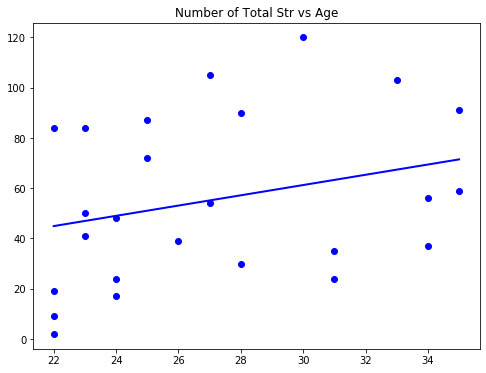

In [217]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Total Str vs Age')
plt.show()

R square is  0.09715537532652856
Predictions on Y values [17.81118881 18.6207883  19.43038779]
Age values are [22 23 24]
Coefficent is  [[0.80959949]]
Intercept is  0.0


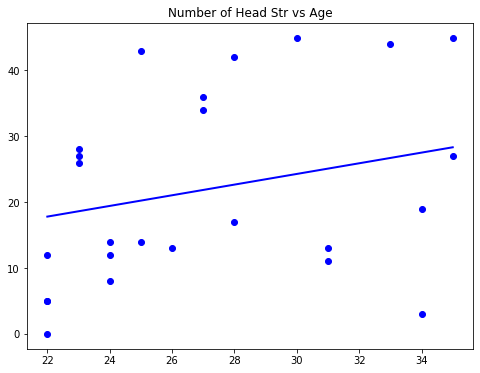

In [218]:
lm = LinearRegression(fit_intercept=False)

#Complete full values
X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
y = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)

lm.fit(X,y)

ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
#print(ESS)
RSS = np.sum((y - lm.predict(X)) ** 2)
#RSS = np.sum((np.unique(X) - np.unique(lm.predict(X))) ** 2)
#print(RSS)
R_sq = ESS/(ESS+RSS)
print('R square is ',R_sq)

print('Predictions on Y values',np.unique(lm.predict(X)[0:9].reshape(1,-1)))
print('Age values are',np.unique(fighter_df_exam_WW_full['age'].values[0:9]))
print('Coefficent is ',lm.coef_)
print('Intercept is ',lm.intercept_)

plt.figure(figsize=(8,6))
#Complete column values
plt.scatter(X, y,color='blue')

#Complete values
plt.plot(X,lm.predict(X),color='blue',linewidth=2)
plt.title('Number of Head Str vs Age')
plt.show()

**Prediction**

In [219]:
#Import the ML data frame input

test_ML = df=pd.read_csv(r'Capstone_1/UFC/ML Dataframe Input.xlsx',sep=';')
print(test_ML)
print()
print(test_ML.shape)
to_drop=['R_fighter', 'B_fighter', 'date', 'R_age', 'B_age', 'R_DOB','B_DOB','R_Winner','B_Winner',
        'Decision','KO/TKO','Submission']
test_features_ML = test_ML.drop(columns=to_drop)
print()
print(test_features_ML)
test_features_ML = np.array(test_features_ML)
test_features_ML

FileNotFoundError: [Errno 2] File b'Capstone_1/ML Dataframe Input.csv' does not exist: b'Capstone_1/ML Dataframe Input.csv'

In [ ]:
to_drop=['R_fighter', 'B_fighter', 'R_Num_Head','B_Num_Head','R_Total_Str',
         'B_Total_Str','R_Sig_Str','B_Sig_Str','date', 'R_age', 'B_age', 'R_DOB','B_DOB']
test_labels_ML = test_ML.drop(columns=to_drop)
test_labels_ML
test_labels_ML = np.array(test_labels_ML)
test_labels_ML

In [ ]:
#print(test_labels.shape)
#test_labels

In [ ]:
def calc_coefficients(input1,input2):
    #This data frame is for one fighter and their respective weight class
    fighter_df_exam_WW = fighter_df3.loc[(fighter_df3['fighter'] == fighter_name) & (fighter_df3['weight_class'] == wt_class)]
    fighter_df_exam_WW.sort_values('date', inplace=True)
    array_size = fighter_df_exam_WW.shape
    to_drop=['fighter','SIG_STR.','TOTAL_STR.','TD','date','fighter_color','weight_class','win_by2','HEAD','BODY','DOB','last_round_time','LEG','DISTANCE','CLINCH','GROUND','win_by','Format','Fight_type']
    fighter_df_exam_WW_full = fighter_df_exam_WW.drop(columns=to_drop)
    array_size2 = fighter_df_exam_WW_full.shape
    
    #Regression
    lm = LinearRegression(fit_intercept=False)
    lm2 = LinearRegression(fit_intercept=False)
    lm3 = LinearRegression(fit_intercept=False)
    X = fighter_df_exam_WW_full['age'].values.reshape(-1,1)
    y = fighter_df_exam_WW_full['Sig_Str'].values.reshape(-1,1)
    y2 = fighter_df_exam_WW_full['Total_Str'].values.reshape(-1,1)
    y3 = fighter_df_exam_WW_full['Num_Head'].values.reshape(-1,1)
    
    
    lm.fit(X,y)
    lm2.fit(X,y2)
    lm3.fit(X,y3)
    
    #R squared
    
    #Sig Str
    ESS = np.sum((np.unique(lm.predict(X)) - np.mean(np.unique(X))) ** 2)
    RSS = np.sum((y - lm.predict(X)) ** 2)
    #RSS = np.sum((y - lm.predict(X)) ** 2)
    R_sq = ESS/(ESS+RSS)

    #Total Str
    ESS2 = np.sum((np.unique(lm2.predict(X)) - np.mean(np.unique(X))) ** 2)
    RSS2 = np.sum((y2 - lm2.predict(X)) ** 2)
    #RSS2 = np.sum((y2 - lm2.predict(X)) ** 2)
    R_sq2 = ESS2/(ESS2+RSS2)
    
    #Head
    ESS3 = np.sum((np.unique(lm3.predict(X)) - np.mean(np.unique(X))) ** 2)
    RSS3 = np.sum((y3 - lm3.predict(X)) ** 2)
    #RSS3 = np.sum((y3 - lm3.predict(X)) ** 2)
    R_sq3 = ESS3/(ESS3+RSS3)
    

    Sig_Str_coeff = lm.coef_
    Total_Str_coeff = lm2.coef_
    Num_Head_coeff = lm3.coef_
    Sig_Str_intercept = lm.intercept_
    return array_size, array_size2, Num_Head_coeff, Total_Str_coeff, Sig_Str_coeff, R_sq3, R_sq2, R_sq

fighter_name='Thiago Alves'
wt_class='Welterweight'

out1, out2, out3, out4, out5, out6, out7, out8 = calc_coefficients(fighter_name,wt_class)

out3 = out3.tolist()[0]
out4 = out4.tolist()[0]
out5 = out5.tolist()[0]
#out6 = out6.tolist()[0]
#out7 = out7.tolist()[0]
#out8 = out8.tolist()[0]

#print(out3[0])
#out3_new = out3.ravel()
#out3_new
#out3[0]

test_list=[]
test_list.append(out3[0])
test_list.append(out4[0])
test_list.append(out5[0])
test_list.append(out6)
test_list.append(out7)
test_list.append(out8)
#test_list

#test_list
#test_list=[]
#test_list.append(out3)
#test_list

**Predicts the outcome with the ML data frame inputs**

In [ ]:
#MUST RUN THIS ONLY AFTER WW RF IS RUN OR IT WILL USE OTHER WEIGHTCLASS DATA!!

# Make predictions and determine the error
predictions = rf_most_important.predict(test_features_ML)
B_fighter_errors = abs(np.round(predictions)[:, 1]-test_labels_ML[:, 1])
Decision_errors = abs(np.round(predictions)[:, 2]-test_labels_ML[:, 2])
KO_errors = abs(np.round(predictions)[:, 3]-test_labels_ML[:, 3])
Sub_errors = abs(np.round(predictions)[:, 4]-test_labels_ML[:, 4])

print('R Fighter, B Fighter, Dec, KO, Sub')
print(predictions)
print()
print('B fighter winning array is',np.round(predictions)[:, 1])
print()

#errors
print('Percent correct for either Fighter is ',1 - (np.sum(B_fighter_errors)/len(B_fighter_errors)))
print('Percent correct for Decision is ',1 - (np.sum(Decision_errors)/len(Decision_errors)))
print('Percent correct for KO/TKO is ',1 - (np.sum(KO_errors)/len(KO_errors)))
print('Percent correct for Submission is ',1 - (np.sum(Sub_errors)/len(Sub_errors)))

In [ ]:
#Create dataframe with R fighter and B fighter predictions for the features and validate it against 
#WW fights that happened after June 2019 and test prediction